In [1]:
from tools import heatmap_eval, UMAP_eval, eval_classifier, vis_classifier
import pandas as pd
import numpy as np


/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


plotnine is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
xgboost is already installed.
numpy is already installed.
scipy is already installed.


## BRCASubtype.csv, CVAE1-20, epoch 285, generated 500 each, quality evaluation

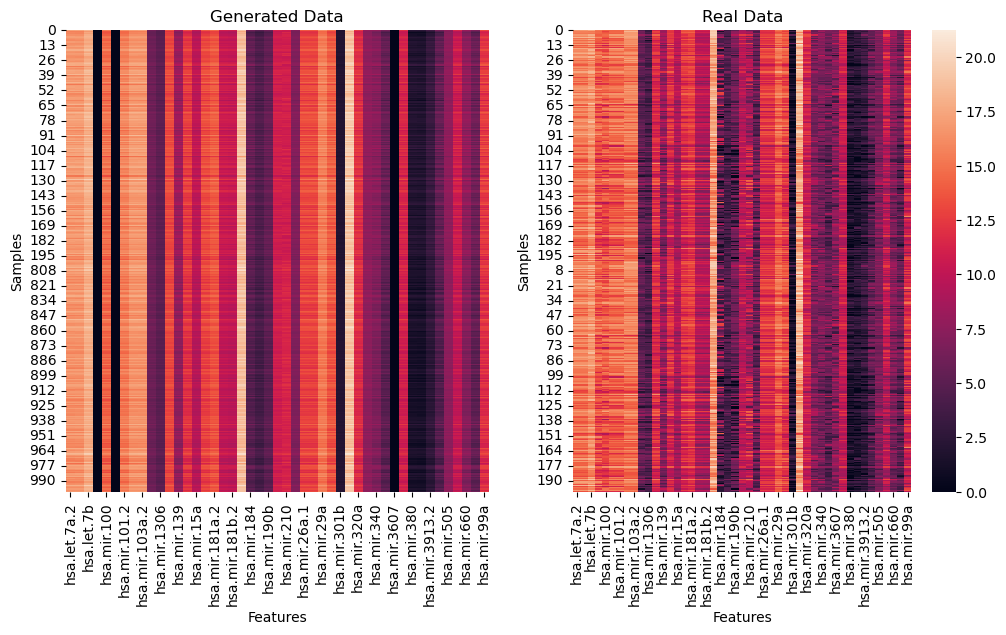

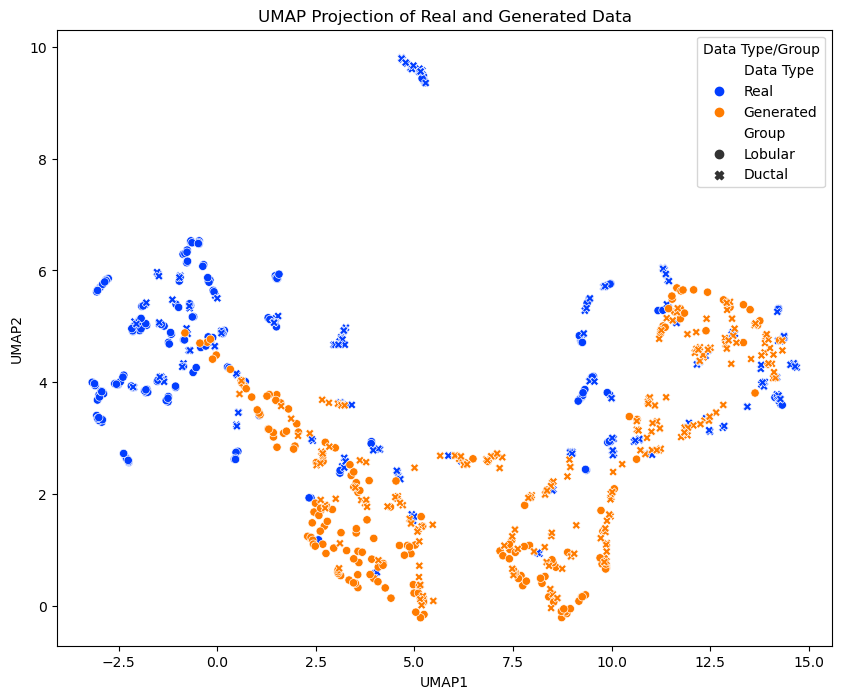

In [2]:
# Read in data
generated = pd.read_csv("Case/BRCASubtypeSel_train_epoch285_CVAE1-20_generated.csv", header=None)
real = pd.read_csv("Case/BRCASubtypeSel_test.csv",header = 0)

# Define the default group level
level0 = real['groups'].iloc[0]
level1 = list(set(real['groups']) - set([level0]))

# Get sample groups
groups_real = pd.Series(np.where(real['groups'] == "Infiltrating Ductal Carcinoma", "Ductal", "Lobular"))

groups_generated = pd.Series(np.where(generated.iloc[:, -1] == 1, "Ductal", "Lobular"))

# Get pure data matrices
real = real.select_dtypes(include=[np.number])
real = np.log2(real + 1)
generated = generated.iloc[:, :real.shape[1]]
generated.columns = real.columns

# Select samples for analysis to save running time
real_ind = list(range(200)) + list(range(len(real) - 200, len(real)))
generated_ind = list(range(200)) + list(range(len(generated) - 200, len(generated)))

# Call evaluation functions
h_subtypes = heatmap_eval(dat_real = real.iloc[real_ind,], dat_generated = generated.iloc[generated_ind,])
p_umap_subtypes = UMAP_eval(dat_real = real.iloc[real_ind,],
                            dat_generated = generated.iloc[generated_ind,],
                            groups_real = groups_real.iloc[real_ind],
                            groups_generated = groups_generated.iloc[generated_ind],
                            legend_pos = "bottom")


## RNABRCASubtype classification accurary multiple classifier

In [3]:
np.random.seed(333)

n_candidate = np.arange(20, 210, 10)  


n_target = np.array([230, 250, 270])  

In [4]:
# Evaluate the classifier for generated data
metric_generated = eval_classifier(whole_generated=generated,
                                   whole_groups=groups_generated,
                                   n_candidate=n_candidate,
                                   n_draw=30, log=True)

metric_generated.to_csv('metric_generated_30.csv', index=False)

20
0 LOGIS scores are clean and numeric: [1.   1.   0.75 0.   0.75]
SVM scores are clean and numeric: [0.75 0.75 0.75 0.5  0.75]
KNN scores are clean and numeric: [0.5  0.75 0.75 0.5  0.5 ]
RF scores are clean and numeric: [0.5  0.5  0.75 0.75 0.75]
XGB scores are clean and numeric: [0.75 0.75 0.5  0.   1.  ]
1 LOGIS scores are clean and numeric: [1.   0.75 1.   0.5  1.  ]
SVM scores are clean and numeric: [1.   0.5  0.75 0.5  0.75]
KNN scores are clean and numeric: [0.5 0.5 0.5 0.5 0.5]
RF scores are clean and numeric: [1.   0.5  1.   0.5  0.75]
XGB scores are clean and numeric: [0.75 0.75 1.   0.5  1.  ]
2 LOGIS scores are clean and numeric: [0.75 1.   0.75 0.5  0.25]
SVM scores are clean and numeric: [0.5  1.   0.5  0.5  0.75]
KNN scores are clean and numeric: [0.75 0.75 0.5  1.   1.  ]
RF scores are clean and numeric: [0.5  0.75 0.5  0.5  0.5 ]
XGB scores are clean and numeric: [0.5  0.75 0.5  0.5  0.75]
3 LOGIS scores are clean and numeric: [1.   0.75 1.   1.   0.75]
SVM scores ar

27 LOGIS scores are clean and numeric: [0.75 1.   1.   0.5  0.5 ]
SVM scores are clean and numeric: [0.75 0.5  1.   0.75 0.5 ]
KNN scores are clean and numeric: [0.5  0.75 0.75 0.5  0.25]
RF scores are clean and numeric: [0.5 1.  1.  0.5 0.5]
XGB scores are clean and numeric: [0.5  1.   1.   0.5  0.75]
28 LOGIS scores are clean and numeric: [1.   1.   1.   1.   0.75]
SVM scores are clean and numeric: [1.   1.   1.   1.   0.75]
KNN scores are clean and numeric: [0.5 0.5 0.5 0.5 1. ]
RF scores are clean and numeric: [1.   1.   0.75 1.   0.75]
XGB scores are clean and numeric: [1.   1.   0.75 1.   0.5 ]
29 LOGIS scores are clean and numeric: [0.5  0.5  0.25 0.5  0.5 ]
SVM scores are clean and numeric: [0.5  0.75 0.25 0.75 0.75]
KNN scores are clean and numeric: [0.25 0.5  0.5  0.5  0.75]
RF scores are clean and numeric: [0.5  0.5  0.75 0.75 1.  ]
XGB scores are clean and numeric: [0.5  0.5  0.75 0.75 0.5 ]
30
0 LOGIS scores are clean and numeric: [0.83333333 0.83333333 1.         1.      

16 LOGIS scores are clean and numeric: [1.         1.         1.         0.66666667 1.        ]
SVM scores are clean and numeric: [0.66666667 1.         1.         0.66666667 0.66666667]
KNN scores are clean and numeric: [0.66666667 1.         0.83333333 0.66666667 0.66666667]
RF scores are clean and numeric: [0.83333333 0.66666667 1.         0.66666667 0.66666667]
XGB scores are clean and numeric: [0.83333333 0.66666667 1.         0.66666667 0.66666667]
17 LOGIS scores are clean and numeric: [0.83333333 0.66666667 1.         1.         1.        ]
SVM scores are clean and numeric: [0.66666667 0.5        1.         1.         0.83333333]
KNN scores are clean and numeric: [0.83333333 0.5        0.83333333 0.83333333 0.83333333]
RF scores are clean and numeric: [0.83333333 0.5        1.         1.         0.83333333]
XGB scores are clean and numeric: [0.83333333 0.5        1.         1.         1.        ]
18 LOGIS scores are clean and numeric: [0.66666667 0.66666667 0.66666667 1.       

6 LOGIS scores are clean and numeric: [0.875 1.    0.875 0.75  0.875]
SVM scores are clean and numeric: [0.625 0.875 0.75  0.875 0.75 ]
KNN scores are clean and numeric: [0.625 0.875 0.75  0.75  0.75 ]
RF scores are clean and numeric: [0.625 0.75  0.75  0.875 0.875]
XGB scores are clean and numeric: [0.625 0.875 0.75  0.75  0.875]
7 LOGIS scores are clean and numeric: [1.    0.875 1.    0.875 0.5  ]
SVM scores are clean and numeric: [0.875 0.875 0.75  0.5   0.625]
KNN scores are clean and numeric: [0.625 0.875 0.75  0.75  0.5  ]
RF scores are clean and numeric: [0.5   0.75  0.625 0.75  0.375]
XGB scores are clean and numeric: [0.625 0.875 0.75  0.75  0.375]
8 LOGIS scores are clean and numeric: [0.625 0.75  0.625 0.75  1.   ]
SVM scores are clean and numeric: [0.375 0.5   0.75  0.75  1.   ]
KNN scores are clean and numeric: [0.375 0.625 0.875 0.875 0.875]
RF scores are clean and numeric: [0.375 0.625 0.875 0.625 0.625]
XGB scores are clean and numeric: [0.5   0.625 0.75  0.875 1.   ]
9

1 LOGIS scores are clean and numeric: [0.8 0.8 0.8 0.7 0.8]
SVM scores are clean and numeric: [0.9 0.9 0.7 0.9 0.8]
KNN scores are clean and numeric: [0.9 0.8 0.7 0.8 0.7]
RF scores are clean and numeric: [0.8 0.9 0.7 0.8 0.7]
XGB scores are clean and numeric: [0.7 0.9 0.9 0.7 0.7]
2 LOGIS scores are clean and numeric: [0.7 0.9 0.8 0.6 0.6]
SVM scores are clean and numeric: [0.7 0.7 0.6 0.4 0.6]
KNN scores are clean and numeric: [0.7 0.7 0.6 0.4 0.7]
RF scores are clean and numeric: [0.6 0.7 0.5 0.6 0.6]
XGB scores are clean and numeric: [0.7 0.5 0.7 0.6 0.6]
3 LOGIS scores are clean and numeric: [0.9 0.8 0.7 0.7 0.7]
SVM scores are clean and numeric: [0.9 0.6 0.7 0.6 0.7]
KNN scores are clean and numeric: [0.8 0.5 0.8 0.6 0.5]
RF scores are clean and numeric: [0.9 0.7 0.7 0.7 0.6]
XGB scores are clean and numeric: [0.9 0.7 0.9 0.7 0.5]
4 LOGIS scores are clean and numeric: [0.9 0.9 0.8 0.7 0.7]
SVM scores are clean and numeric: [0.8 0.8 0.8 0.6 0.8]
KNN scores are clean and numeric: [

0 LOGIS scores are clean and numeric: [0.66666667 0.66666667 0.66666667 1.         1.        ]
SVM scores are clean and numeric: [0.66666667 0.66666667 0.75       0.83333333 0.83333333]
KNN scores are clean and numeric: [0.5        0.58333333 0.66666667 0.83333333 0.75      ]
RF scores are clean and numeric: [0.58333333 0.66666667 0.66666667 0.75       0.83333333]
XGB scores are clean and numeric: [0.66666667 0.66666667 0.75       0.91666667 0.83333333]
1 LOGIS scores are clean and numeric: [0.5        0.91666667 0.91666667 0.58333333 0.75      ]
SVM scores are clean and numeric: [0.66666667 0.83333333 0.75       0.5        0.75      ]
KNN scores are clean and numeric: [0.58333333 0.75       0.66666667 0.66666667 0.75      ]
RF scores are clean and numeric: [0.58333333 0.75       0.75       0.58333333 0.66666667]
XGB scores are clean and numeric: [0.58333333 0.83333333 0.83333333 0.58333333 0.58333333]
2 LOGIS scores are clean and numeric: [0.66666667 0.75       0.91666667 0.75       0

18 LOGIS scores are clean and numeric: [0.66666667 1.         0.91666667 1.         0.83333333]
SVM scores are clean and numeric: [0.66666667 0.83333333 0.75       0.83333333 0.91666667]
KNN scores are clean and numeric: [0.75       0.83333333 0.75       0.91666667 0.75      ]
RF scores are clean and numeric: [0.66666667 0.83333333 0.58333333 0.75       1.        ]
XGB scores are clean and numeric: [0.83333333 0.83333333 0.58333333 0.75       0.83333333]
19 LOGIS scores are clean and numeric: [0.75       0.75       1.         0.91666667 0.91666667]
SVM scores are clean and numeric: [0.58333333 0.83333333 0.91666667 0.58333333 0.83333333]
KNN scores are clean and numeric: [0.58333333 0.83333333 0.83333333 0.58333333 0.75      ]
RF scores are clean and numeric: [0.66666667 0.83333333 1.         0.75       0.91666667]
XGB scores are clean and numeric: [0.75       0.58333333 0.91666667 0.75       1.        ]
20 LOGIS scores are clean and numeric: [0.91666667 0.75       0.83333333 0.8333333

6 LOGIS scores are clean and numeric: [0.78571429 0.71428571 0.85714286 0.85714286 0.78571429]
SVM scores are clean and numeric: [0.5        0.71428571 0.78571429 0.78571429 0.85714286]
KNN scores are clean and numeric: [0.64285714 0.64285714 0.5        0.85714286 0.78571429]
RF scores are clean and numeric: [0.42857143 0.64285714 0.78571429 0.85714286 0.71428571]
XGB scores are clean and numeric: [0.64285714 0.78571429 0.78571429 0.78571429 0.92857143]
7 LOGIS scores are clean and numeric: [0.85714286 0.92857143 0.5        0.64285714 0.78571429]
SVM scores are clean and numeric: [0.71428571 0.71428571 0.78571429 0.71428571 0.71428571]
KNN scores are clean and numeric: [0.71428571 0.78571429 0.78571429 0.78571429 0.71428571]
RF scores are clean and numeric: [0.64285714 0.71428571 0.71428571 0.57142857 0.64285714]
XGB scores are clean and numeric: [0.57142857 0.71428571 0.85714286 0.5        0.64285714]
8 LOGIS scores are clean and numeric: [0.71428571 0.5        0.85714286 0.71428571 0

24 LOGIS scores are clean and numeric: [0.85714286 0.64285714 0.64285714 0.71428571 1.        ]
SVM scores are clean and numeric: [0.78571429 0.71428571 0.57142857 0.78571429 0.92857143]
KNN scores are clean and numeric: [0.71428571 0.71428571 0.57142857 0.85714286 0.92857143]
RF scores are clean and numeric: [0.85714286 0.64285714 0.57142857 0.85714286 0.85714286]
XGB scores are clean and numeric: [0.78571429 0.64285714 0.64285714 0.71428571 0.85714286]
25 LOGIS scores are clean and numeric: [0.78571429 0.71428571 0.85714286 0.57142857 1.        ]
SVM scores are clean and numeric: [0.92857143 0.71428571 0.78571429 0.64285714 0.78571429]
KNN scores are clean and numeric: [0.78571429 0.85714286 0.71428571 0.57142857 0.85714286]
RF scores are clean and numeric: [0.85714286 0.64285714 0.71428571 0.85714286 0.78571429]
XGB scores are clean and numeric: [0.92857143 0.64285714 0.64285714 0.71428571 0.71428571]
26 LOGIS scores are clean and numeric: [0.78571429 0.78571429 0.71428571 0.8571428

16 LOGIS scores are clean and numeric: [0.6875 0.9375 0.8125 0.5625 0.9375]
SVM scores are clean and numeric: [0.6875 0.8125 0.8125 0.8125 0.9375]
KNN scores are clean and numeric: [0.75   0.8125 0.6875 0.8125 0.875 ]
RF scores are clean and numeric: [0.8125 0.8125 0.75   0.6875 0.875 ]
XGB scores are clean and numeric: [0.75   1.     0.75   0.6875 0.9375]
17 LOGIS scores are clean and numeric: [0.5625 0.9375 0.625  0.9375 0.6875]
SVM scores are clean and numeric: [0.75   0.9375 0.5625 0.75   0.8125]
KNN scores are clean and numeric: [0.625  0.8125 0.5625 0.6875 0.75  ]
RF scores are clean and numeric: [0.875 0.875 0.5   0.75  0.75 ]
XGB scores are clean and numeric: [0.75   0.875  0.5625 0.75   0.75  ]
18 LOGIS scores are clean and numeric: [0.6875 0.875  0.875  1.     0.875 ]
SVM scores are clean and numeric: [0.6875 0.5625 0.75   0.875  0.8125]
KNN scores are clean and numeric: [0.625  0.4375 0.75   0.8125 0.9375]
RF scores are clean and numeric: [0.75   0.625  0.6875 0.75   0.8125]

7 LOGIS scores are clean and numeric: [0.66666667 0.83333333 0.66666667 0.94444444 0.66666667]
SVM scores are clean and numeric: [0.72222222 0.61111111 0.77777778 0.77777778 0.72222222]
KNN scores are clean and numeric: [0.72222222 0.61111111 0.77777778 0.83333333 0.61111111]
RF scores are clean and numeric: [0.66666667 0.66666667 0.83333333 0.83333333 0.77777778]
XGB scores are clean and numeric: [0.77777778 0.77777778 0.72222222 0.88888889 0.83333333]
8 LOGIS scores are clean and numeric: [0.88888889 0.88888889 0.66666667 0.94444444 0.94444444]
SVM scores are clean and numeric: [0.72222222 0.83333333 0.77777778 0.94444444 0.88888889]
KNN scores are clean and numeric: [0.77777778 0.72222222 0.66666667 0.88888889 0.88888889]
RF scores are clean and numeric: [0.77777778 0.83333333 0.72222222 0.94444444 0.88888889]
XGB scores are clean and numeric: [0.66666667 0.77777778 0.66666667 0.83333333 0.88888889]
9 LOGIS scores are clean and numeric: [0.66666667 0.83333333 0.88888889 0.83333333 0

25 LOGIS scores are clean and numeric: [1.         0.94444444 0.94444444 0.88888889 0.83333333]
SVM scores are clean and numeric: [0.83333333 0.88888889 0.77777778 0.83333333 0.77777778]
KNN scores are clean and numeric: [0.77777778 0.83333333 0.77777778 0.83333333 0.77777778]
RF scores are clean and numeric: [0.66666667 0.94444444 0.88888889 0.77777778 0.83333333]
XGB scores are clean and numeric: [0.72222222 0.83333333 0.72222222 0.77777778 0.83333333]
26 LOGIS scores are clean and numeric: [0.88888889 0.77777778 0.72222222 0.94444444 0.94444444]
SVM scores are clean and numeric: [0.72222222 0.72222222 0.72222222 0.94444444 0.77777778]
KNN scores are clean and numeric: [0.72222222 0.66666667 0.66666667 0.88888889 0.72222222]
RF scores are clean and numeric: [0.88888889 0.77777778 0.72222222 0.88888889 0.77777778]
XGB scores are clean and numeric: [0.83333333 0.77777778 0.66666667 0.94444444 0.72222222]
27 LOGIS scores are clean and numeric: [0.83333333 0.77777778 1.         0.7777777

20 LOGIS scores are clean and numeric: [0.85 0.7  0.8  0.9  0.65]
SVM scores are clean and numeric: [0.8  0.6  0.65 0.8  0.85]
KNN scores are clean and numeric: [0.7  0.6  0.7  0.65 0.8 ]
RF scores are clean and numeric: [0.9  0.6  0.65 0.75 0.75]
XGB scores are clean and numeric: [0.7  0.6  0.65 0.7  0.8 ]
21 LOGIS scores are clean and numeric: [1.   0.8  0.75 0.85 0.85]
SVM scores are clean and numeric: [0.7  0.8  0.75 0.7  0.8 ]
KNN scores are clean and numeric: [0.7  0.85 0.8  0.75 0.9 ]
RF scores are clean and numeric: [0.75 0.75 0.65 0.8  0.8 ]
XGB scores are clean and numeric: [0.85 0.75 0.55 0.8  0.75]
22 LOGIS scores are clean and numeric: [0.5  0.85 0.75 0.9  0.85]
SVM scores are clean and numeric: [0.9  0.7  0.7  0.65 0.8 ]
KNN scores are clean and numeric: [0.85 0.55 0.6  0.65 0.7 ]
RF scores are clean and numeric: [0.85 0.75 0.8  0.65 0.6 ]
XGB scores are clean and numeric: [0.75 0.75 0.75 0.7  0.75]
23 LOGIS scores are clean and numeric: [0.8  0.8  0.7  0.75 0.8 ]
SVM sco

12 LOGIS scores are clean and numeric: [0.72727273 0.81818182 0.77272727 0.72727273 0.90909091]
SVM scores are clean and numeric: [0.77272727 0.72727273 0.72727273 0.81818182 0.90909091]
KNN scores are clean and numeric: [0.68181818 0.59090909 0.68181818 0.72727273 0.81818182]
RF scores are clean and numeric: [0.77272727 0.63636364 0.68181818 0.72727273 0.86363636]
XGB scores are clean and numeric: [0.77272727 0.72727273 0.72727273 0.81818182 0.86363636]
13 LOGIS scores are clean and numeric: [0.68181818 0.86363636 0.72727273 0.86363636 0.72727273]
SVM scores are clean and numeric: [0.72727273 0.77272727 0.77272727 0.81818182 0.77272727]
KNN scores are clean and numeric: [0.68181818 0.68181818 0.68181818 0.77272727 0.72727273]
RF scores are clean and numeric: [0.68181818 0.63636364 0.72727273 0.86363636 0.81818182]
XGB scores are clean and numeric: [0.63636364 0.59090909 0.72727273 0.90909091 0.68181818]
14 LOGIS scores are clean and numeric: [1.         1.         0.86363636 0.9545454

0 LOGIS scores are clean and numeric: [0.79166667 0.83333333 0.79166667 0.75       0.83333333]
SVM scores are clean and numeric: [0.79166667 0.875      0.79166667 0.75       0.75      ]
KNN scores are clean and numeric: [0.83333333 0.91666667 0.70833333 0.70833333 0.75      ]
RF scores are clean and numeric: [0.83333333 0.79166667 0.70833333 0.83333333 0.75      ]
XGB scores are clean and numeric: [0.79166667 0.75       0.79166667 0.83333333 0.75      ]
1 LOGIS scores are clean and numeric: [0.79166667 0.79166667 0.875      0.75       0.83333333]
SVM scores are clean and numeric: [0.83333333 0.66666667 0.875      0.625      0.75      ]
KNN scores are clean and numeric: [0.79166667 0.66666667 0.79166667 0.70833333 0.75      ]
RF scores are clean and numeric: [0.875      0.70833333 0.625      0.625      0.79166667]
XGB scores are clean and numeric: [0.91666667 0.66666667 0.66666667 0.625      0.79166667]
2 LOGIS scores are clean and numeric: [0.91666667 0.66666667 0.70833333 0.91666667 0

18 LOGIS scores are clean and numeric: [0.95833333 0.875      0.95833333 0.79166667 0.70833333]
SVM scores are clean and numeric: [0.83333333 0.91666667 0.875      0.95833333 0.58333333]
KNN scores are clean and numeric: [0.70833333 0.875      0.83333333 0.875      0.70833333]
RF scores are clean and numeric: [0.79166667 0.95833333 0.83333333 0.83333333 0.625     ]
XGB scores are clean and numeric: [0.83333333 0.95833333 0.875      0.75       0.66666667]
19 LOGIS scores are clean and numeric: [0.79166667 0.91666667 0.79166667 0.875      0.83333333]
SVM scores are clean and numeric: [0.91666667 0.91666667 0.79166667 0.875      0.75      ]
KNN scores are clean and numeric: [0.83333333 0.83333333 0.75       0.875      0.70833333]
RF scores are clean and numeric: [0.875      0.875      0.79166667 0.75       0.79166667]
XGB scores are clean and numeric: [0.91666667 0.83333333 0.75       0.83333333 0.79166667]
20 LOGIS scores are clean and numeric: [0.83333333 0.83333333 0.75       0.7083333

6 LOGIS scores are clean and numeric: [0.80769231 0.73076923 0.84615385 0.69230769 0.88461538]
SVM scores are clean and numeric: [0.88461538 0.65384615 0.69230769 0.65384615 0.84615385]
KNN scores are clean and numeric: [0.73076923 0.65384615 0.73076923 0.61538462 0.76923077]
RF scores are clean and numeric: [0.73076923 0.57692308 0.69230769 0.69230769 0.92307692]
XGB scores are clean and numeric: [0.73076923 0.65384615 0.76923077 0.73076923 0.84615385]
7 LOGIS scores are clean and numeric: [0.76923077 0.80769231 0.76923077 0.76923077 0.80769231]
SVM scores are clean and numeric: [0.69230769 0.84615385 0.69230769 0.84615385 0.80769231]
KNN scores are clean and numeric: [0.69230769 0.92307692 0.69230769 0.84615385 0.80769231]
RF scores are clean and numeric: [0.69230769 0.76923077 0.65384615 0.80769231 0.80769231]
XGB scores are clean and numeric: [0.73076923 0.76923077 0.61538462 0.80769231 0.80769231]
8 LOGIS scores are clean and numeric: [0.84615385 0.92307692 0.80769231 0.84615385 0

24 LOGIS scores are clean and numeric: [0.80769231 0.76923077 0.84615385 0.84615385 0.80769231]
SVM scores are clean and numeric: [0.65384615 0.73076923 0.76923077 0.80769231 0.80769231]
KNN scores are clean and numeric: [0.80769231 0.76923077 0.76923077 0.80769231 0.80769231]
RF scores are clean and numeric: [0.69230769 0.80769231 0.84615385 0.80769231 0.76923077]
XGB scores are clean and numeric: [0.69230769 0.80769231 0.73076923 0.76923077 0.80769231]
25 LOGIS scores are clean and numeric: [0.88461538 0.69230769 0.69230769 0.84615385 0.88461538]
SVM scores are clean and numeric: [0.73076923 0.76923077 0.61538462 0.80769231 0.76923077]
KNN scores are clean and numeric: [0.69230769 0.73076923 0.65384615 0.73076923 0.73076923]
RF scores are clean and numeric: [0.88461538 0.61538462 0.65384615 0.80769231 0.76923077]
XGB scores are clean and numeric: [0.76923077 0.65384615 0.80769231 0.80769231 0.73076923]
26 LOGIS scores are clean and numeric: [0.73076923 0.84615385 0.88461538 0.8076923

12 LOGIS scores are clean and numeric: [0.78571429 0.92857143 0.82142857 0.96428571 0.78571429]
SVM scores are clean and numeric: [0.75       0.89285714 0.82142857 0.85714286 0.89285714]
KNN scores are clean and numeric: [0.67857143 0.78571429 0.85714286 0.89285714 0.85714286]
RF scores are clean and numeric: [0.75       0.85714286 0.85714286 0.89285714 0.85714286]
XGB scores are clean and numeric: [0.78571429 0.82142857 0.89285714 0.96428571 0.78571429]
13 LOGIS scores are clean and numeric: [0.82142857 0.89285714 1.         0.82142857 0.64285714]
SVM scores are clean and numeric: [0.78571429 0.78571429 0.78571429 0.71428571 0.85714286]
KNN scores are clean and numeric: [0.71428571 0.75       0.75       0.71428571 0.82142857]
RF scores are clean and numeric: [0.78571429 0.89285714 0.71428571 0.67857143 0.89285714]
XGB scores are clean and numeric: [0.64285714 0.82142857 0.71428571 0.78571429 0.96428571]
14 LOGIS scores are clean and numeric: [0.92857143 0.89285714 0.89285714 0.7857142

0 LOGIS scores are clean and numeric: [0.9        0.83333333 0.73333333 0.73333333 0.9       ]
SVM scores are clean and numeric: [0.8        0.76666667 0.76666667 0.7        0.73333333]
KNN scores are clean and numeric: [0.8 0.8 0.7 0.7 0.8]
RF scores are clean and numeric: [0.86666667 0.73333333 0.76666667 0.66666667 0.7       ]
XGB scores are clean and numeric: [0.76666667 0.73333333 0.66666667 0.73333333 0.73333333]
1 LOGIS scores are clean and numeric: [0.9        0.73333333 1.         0.83333333 0.6       ]
SVM scores are clean and numeric: [0.66666667 0.73333333 0.93333333 0.73333333 0.76666667]
KNN scores are clean and numeric: [0.63333333 0.73333333 0.86666667 0.8        0.76666667]
RF scores are clean and numeric: [0.7        0.76666667 0.9        0.73333333 0.63333333]
XGB scores are clean and numeric: [0.73333333 0.76666667 0.93333333 0.76666667 0.73333333]
2 LOGIS scores are clean and numeric: [0.86666667 0.96666667 0.9        0.86666667 0.83333333]
SVM scores are clean and

18 LOGIS scores are clean and numeric: [0.76666667 0.86666667 0.86666667 0.8        0.76666667]
SVM scores are clean and numeric: [0.76666667 0.7        0.83333333 0.8        0.76666667]
KNN scores are clean and numeric: [0.6        0.73333333 0.76666667 0.7        0.73333333]
RF scores are clean and numeric: [0.63333333 0.73333333 0.8        0.7        0.66666667]
XGB scores are clean and numeric: [0.66666667 0.7        0.8        0.73333333 0.66666667]
19 LOGIS scores are clean and numeric: [0.93333333 0.9        0.96666667 0.83333333 0.83333333]
SVM scores are clean and numeric: [0.9        0.83333333 0.76666667 0.83333333 0.76666667]
KNN scores are clean and numeric: [0.9        0.8        0.73333333 0.76666667 0.76666667]
RF scores are clean and numeric: [0.8        0.9        0.73333333 0.8        0.66666667]
XGB scores are clean and numeric: [0.76666667 0.83333333 0.7        0.8        0.66666667]
20 LOGIS scores are clean and numeric: [0.73333333 0.9        0.76666667 0.7666666

8 LOGIS scores are clean and numeric: [0.96875 0.875   0.71875 0.84375 0.75   ]
SVM scores are clean and numeric: [0.84375 0.75    0.78125 0.75    0.71875]
KNN scores are clean and numeric: [0.84375 0.75    0.8125  0.71875 0.71875]
RF scores are clean and numeric: [0.78125 0.65625 0.8125  0.78125 0.71875]
XGB scores are clean and numeric: [0.75    0.71875 0.75    0.75    0.75   ]
9 LOGIS scores are clean and numeric: [0.84375 0.875   0.875   0.875   0.84375]
SVM scores are clean and numeric: [0.78125 0.8125  0.78125 0.78125 0.78125]
KNN scores are clean and numeric: [0.78125 0.75    0.8125  0.8125  0.65625]
RF scores are clean and numeric: [0.875   0.84375 0.78125 0.78125 0.65625]
XGB scores are clean and numeric: [0.84375 0.78125 0.875   0.71875 0.78125]
10 LOGIS scores are clean and numeric: [0.96875 0.90625 0.8125  0.84375 0.84375]
SVM scores are clean and numeric: [0.9375  0.84375 0.71875 0.6875  0.84375]
KNN scores are clean and numeric: [0.90625 0.75    0.65625 0.75    0.8125 ]
R

0 LOGIS scores are clean and numeric: [0.76470588 0.82352941 0.79411765 0.88235294 0.85294118]
SVM scores are clean and numeric: [0.76470588 0.85294118 0.79411765 0.73529412 0.82352941]
KNN scores are clean and numeric: [0.70588235 0.85294118 0.85294118 0.73529412 0.73529412]
RF scores are clean and numeric: [0.70588235 0.76470588 0.79411765 0.79411765 0.76470588]
XGB scores are clean and numeric: [0.67647059 0.82352941 0.73529412 0.79411765 0.73529412]
1 LOGIS scores are clean and numeric: [0.79411765 0.76470588 0.85294118 0.94117647 0.88235294]
SVM scores are clean and numeric: [0.67647059 0.70588235 0.82352941 0.94117647 0.73529412]
KNN scores are clean and numeric: [0.67647059 0.64705882 0.82352941 0.91176471 0.67647059]
RF scores are clean and numeric: [0.61764706 0.70588235 0.88235294 0.94117647 0.73529412]
XGB scores are clean and numeric: [0.64705882 0.73529412 0.73529412 0.91176471 0.76470588]
2 LOGIS scores are clean and numeric: [0.85294118 0.85294118 0.82352941 0.76470588 0

18 LOGIS scores are clean and numeric: [0.82352941 0.70588235 0.73529412 0.88235294 0.79411765]
SVM scores are clean and numeric: [0.85294118 0.61764706 0.82352941 0.91176471 0.70588235]
KNN scores are clean and numeric: [0.88235294 0.67647059 0.79411765 0.82352941 0.67647059]
RF scores are clean and numeric: [0.79411765 0.70588235 0.73529412 0.88235294 0.67647059]
XGB scores are clean and numeric: [0.82352941 0.70588235 0.76470588 0.88235294 0.67647059]
19 LOGIS scores are clean and numeric: [0.94117647 0.79411765 0.82352941 0.88235294 0.79411765]
SVM scores are clean and numeric: [0.79411765 0.70588235 0.73529412 0.76470588 0.82352941]
KNN scores are clean and numeric: [0.76470588 0.73529412 0.67647059 0.73529412 0.73529412]
RF scores are clean and numeric: [0.76470588 0.73529412 0.76470588 0.76470588 0.70588235]
XGB scores are clean and numeric: [0.73529412 0.70588235 0.67647059 0.70588235 0.70588235]
20 LOGIS scores are clean and numeric: [0.52941176 0.67647059 0.94117647 0.8235294

6 LOGIS scores are clean and numeric: [0.86111111 0.83333333 0.83333333 0.77777778 0.91666667]
SVM scores are clean and numeric: [0.83333333 0.77777778 0.80555556 0.63888889 0.77777778]
KNN scores are clean and numeric: [0.77777778 0.83333333 0.80555556 0.61111111 0.75      ]
RF scores are clean and numeric: [0.80555556 0.80555556 0.86111111 0.63888889 0.77777778]
XGB scores are clean and numeric: [0.77777778 0.80555556 0.80555556 0.55555556 0.83333333]
7 LOGIS scores are clean and numeric: [0.77777778 0.80555556 0.75       0.86111111 0.80555556]
SVM scores are clean and numeric: [0.80555556 0.80555556 0.75       0.88888889 0.69444444]
KNN scores are clean and numeric: [0.75       0.80555556 0.72222222 0.80555556 0.66666667]
RF scores are clean and numeric: [0.69444444 0.83333333 0.77777778 0.88888889 0.69444444]
XGB scores are clean and numeric: [0.72222222 0.80555556 0.69444444 0.94444444 0.66666667]
8 LOGIS scores are clean and numeric: [0.86111111 0.88888889 0.75       0.75       0

24 LOGIS scores are clean and numeric: [0.83333333 0.83333333 0.88888889 0.80555556 0.61111111]
SVM scores are clean and numeric: [0.83333333 0.83333333 0.80555556 0.72222222 0.69444444]
KNN scores are clean and numeric: [0.77777778 0.72222222 0.77777778 0.77777778 0.72222222]
RF scores are clean and numeric: [0.75       0.69444444 0.75       0.75       0.75      ]
XGB scores are clean and numeric: [0.77777778 0.75       0.72222222 0.77777778 0.69444444]
25 LOGIS scores are clean and numeric: [0.80555556 0.63888889 0.86111111 0.75       0.83333333]
SVM scores are clean and numeric: [0.69444444 0.72222222 0.83333333 0.83333333 0.88888889]
KNN scores are clean and numeric: [0.69444444 0.66666667 0.72222222 0.88888889 0.88888889]
RF scores are clean and numeric: [0.66666667 0.72222222 0.77777778 0.83333333 0.83333333]
XGB scores are clean and numeric: [0.75       0.66666667 0.75       0.77777778 0.83333333]
26 LOGIS scores are clean and numeric: [0.88888889 0.86111111 0.91666667 0.6388888

12 LOGIS scores are clean and numeric: [0.71052632 0.71052632 0.78947368 0.78947368 0.94736842]
SVM scores are clean and numeric: [0.76315789 0.78947368 0.84210526 0.76315789 0.89473684]
KNN scores are clean and numeric: [0.68421053 0.71052632 0.78947368 0.76315789 0.81578947]
RF scores are clean and numeric: [0.76315789 0.81578947 0.84210526 0.76315789 0.84210526]
XGB scores are clean and numeric: [0.65789474 0.84210526 0.84210526 0.76315789 0.89473684]
13 LOGIS scores are clean and numeric: [0.84210526 0.86842105 0.81578947 0.78947368 0.84210526]
SVM scores are clean and numeric: [0.86842105 0.73684211 0.76315789 0.71052632 0.78947368]
KNN scores are clean and numeric: [0.81578947 0.71052632 0.73684211 0.68421053 0.81578947]
RF scores are clean and numeric: [0.81578947 0.78947368 0.78947368 0.68421053 0.73684211]
XGB scores are clean and numeric: [0.78947368 0.84210526 0.78947368 0.76315789 0.78947368]
14 LOGIS scores are clean and numeric: [0.78947368 0.71052632 0.78947368 0.9736842

0 LOGIS scores are clean and numeric: [0.85  0.95  0.975 0.875 0.875]
SVM scores are clean and numeric: [0.8   0.725 0.775 0.85  0.875]
KNN scores are clean and numeric: [0.8   0.725 0.725 0.825 0.925]
RF scores are clean and numeric: [0.85  0.775 0.775 0.825 0.85 ]
XGB scores are clean and numeric: [0.8   0.725 0.8   0.825 0.85 ]
1 LOGIS scores are clean and numeric: [0.925 0.85  0.75  0.6   0.75 ]
SVM scores are clean and numeric: [0.8   0.8   0.75  0.75  0.725]
KNN scores are clean and numeric: [0.7   0.75  0.725 0.825 0.675]
RF scores are clean and numeric: [0.75  0.675 0.725 0.8   0.775]
XGB scores are clean and numeric: [0.7   0.75  0.75  0.725 0.75 ]
2 LOGIS scores are clean and numeric: [0.75  0.825 0.925 0.65  0.8  ]
SVM scores are clean and numeric: [0.7   0.875 0.925 0.825 0.8  ]
KNN scores are clean and numeric: [0.75  0.825 0.875 0.8   0.775]
RF scores are clean and numeric: [0.725 0.8   0.875 0.775 0.75 ]
XGB scores are clean and numeric: [0.775 0.825 0.9   0.75  0.8  ]
3

25 LOGIS scores are clean and numeric: [0.85  0.8   0.85  0.825 0.8  ]
SVM scores are clean and numeric: [0.875 0.8   0.775 0.8   0.75 ]
KNN scores are clean and numeric: [0.875 0.75  0.775 0.75  0.7  ]
RF scores are clean and numeric: [0.85 0.75 0.7  0.8  0.75]
XGB scores are clean and numeric: [0.875 0.75  0.775 0.725 0.825]
26 LOGIS scores are clean and numeric: [0.825 0.8   0.85  0.825 0.8  ]
SVM scores are clean and numeric: [0.8   0.775 0.85  0.8   0.8  ]
KNN scores are clean and numeric: [0.8   0.8   0.85  0.8   0.725]
RF scores are clean and numeric: [0.725 0.775 0.85  0.725 0.8  ]
XGB scores are clean and numeric: [0.8   0.725 0.9   0.7   0.775]
27 LOGIS scores are clean and numeric: [0.85  0.825 0.875 0.65  0.85 ]
SVM scores are clean and numeric: [0.7   0.725 0.7   0.725 0.875]
KNN scores are clean and numeric: [0.7   0.725 0.725 0.675 0.825]
RF scores are clean and numeric: [0.7  0.7  0.7  0.7  0.85]
XGB scores are clean and numeric: [0.725 0.75  0.75  0.775 0.825]
28 LOGIS

In [5]:
# Evaluate the classifier for real data
metric_real = eval_classifier(whole_generated=real,
                              whole_groups=groups_real,
                              n_candidate=n_candidate,
                              n_draw=30, log=True)
metric_real.to_csv('metric_real.csv_30', index=False)

20
0 LOGIS scores are clean and numeric: [0.75 0.   0.75 0.   0.5 ]
SVM scores are clean and numeric: [0.5  0.25 1.   0.25 0.75]
KNN scores are clean and numeric: [0.5 0.5 0.  0.5 0.5]
RF scores are clean and numeric: [0.5  0.5  1.   0.75 0.5 ]
XGB scores are clean and numeric: [0.75 0.25 1.   0.75 0.5 ]
1 LOGIS scores are clean and numeric: [0.5  0.5  1.   1.   0.75]
SVM scores are clean and numeric: [0.5  1.   1.   1.   0.75]
KNN scores are clean and numeric: [0.25 1.   1.   0.5  0.5 ]
RF scores are clean and numeric: [0.5  1.   1.   1.   0.75]
XGB scores are clean and numeric: [0.5 0.5 1.  1.  1. ]
2 LOGIS scores are clean and numeric: [1.   0.75 1.   0.75 1.  ]
SVM scores are clean and numeric: [1.   1.   1.   0.75 0.75]
KNN scores are clean and numeric: [0.25 0.5  0.75 0.75 0.75]
RF scores are clean and numeric: [1.   1.   1.   0.75 1.  ]
XGB scores are clean and numeric: [1. 1. 1. 1. 1.]
3 LOGIS scores are clean and numeric: [0.5  0.   0.25 1.   0.75]
SVM scores are clean and num

27 LOGIS scores are clean and numeric: [0.75 1.   0.5  1.   0.5 ]
SVM scores are clean and numeric: [1.   1.   0.5  1.   0.75]
KNN scores are clean and numeric: [1.  1.  0.5 1.  0.5]
RF scores are clean and numeric: [1.  1.  0.5 1.  1. ]
XGB scores are clean and numeric: [1.   1.   0.75 1.   0.75]
28 LOGIS scores are clean and numeric: [0.5  0.5  0.5  0.25 0.5 ]
SVM scores are clean and numeric: [0.25 0.5  0.75 0.5  0.5 ]
KNN scores are clean and numeric: [0.5 0.5 0.5 0.5 0.5]
RF scores are clean and numeric: [0.5  0.5  0.75 0.5  0.75]
XGB scores are clean and numeric: [0.25 0.5  0.75 0.5  1.  ]
29 LOGIS scores are clean and numeric: [0.25 1.   0.75 0.5  1.  ]
SVM scores are clean and numeric: [0.25 1.   0.75 0.75 1.  ]
KNN scores are clean and numeric: [0.25 0.75 1.   0.5  0.75]
RF scores are clean and numeric: [0.25 0.75 1.   0.75 0.75]
XGB scores are clean and numeric: [0.25 0.5  0.5  0.75 0.75]
30
0 LOGIS scores are clean and numeric: [0.83333333 0.66666667 0.66666667 0.33333333 0.

16 LOGIS scores are clean and numeric: [1.         0.83333333 0.83333333 0.66666667 0.66666667]
SVM scores are clean and numeric: [1.         0.66666667 0.83333333 0.83333333 0.83333333]
KNN scores are clean and numeric: [0.83333333 0.66666667 0.83333333 0.83333333 0.83333333]
RF scores are clean and numeric: [1.         0.5        0.83333333 0.83333333 0.83333333]
XGB scores are clean and numeric: [1.         0.5        0.83333333 0.83333333 0.83333333]
17 LOGIS scores are clean and numeric: [0.66666667 0.33333333 0.33333333 0.16666667 0.66666667]
SVM scores are clean and numeric: [1.         0.5        0.33333333 0.66666667 0.66666667]
KNN scores are clean and numeric: [0.83333333 0.66666667 0.5        0.66666667 0.66666667]
RF scores are clean and numeric: [1.         0.66666667 0.33333333 0.66666667 0.66666667]
XGB scores are clean and numeric: [0.5        0.33333333 0.33333333 0.66666667 0.66666667]
18 LOGIS scores are clean and numeric: [0.5        0.83333333 0.83333333 0.6666666

6 LOGIS scores are clean and numeric: [0.625 0.5   0.875 1.    0.75 ]
SVM scores are clean and numeric: [0.875 0.75  0.875 1.    0.75 ]
KNN scores are clean and numeric: [0.875 0.75  0.625 0.875 0.875]
RF scores are clean and numeric: [0.875 0.75  0.625 1.    0.75 ]
XGB scores are clean and numeric: [1.    0.75  0.625 0.875 0.75 ]
7 LOGIS scores are clean and numeric: [0.625 0.75  0.625 0.875 0.875]
SVM scores are clean and numeric: [0.625 0.625 0.875 0.875 0.75 ]
KNN scores are clean and numeric: [0.5   0.5   0.75  0.875 0.5  ]
RF scores are clean and numeric: [0.625 0.5   0.75  0.875 0.75 ]
XGB scores are clean and numeric: [0.625 0.875 0.625 0.625 0.75 ]
8 LOGIS scores are clean and numeric: [0.875 1.    0.625 0.875 0.75 ]
SVM scores are clean and numeric: [0.875 0.875 0.5   0.875 0.75 ]
KNN scores are clean and numeric: [0.625 0.875 0.375 0.625 0.875]
RF scores are clean and numeric: [0.875 0.875 0.5   0.875 0.75 ]
XGB scores are clean and numeric: [0.875 0.875 0.5   0.875 0.75 ]
9

1 LOGIS scores are clean and numeric: [1.  0.8 0.9 0.8 0.9]
SVM scores are clean and numeric: [0.9 0.9 0.7 0.9 0.7]
KNN scores are clean and numeric: [0.9 0.8 0.6 0.9 0.7]
RF scores are clean and numeric: [0.9 0.7 0.7 0.9 0.7]
XGB scores are clean and numeric: [0.7 0.6 0.7 0.6 0.7]
2 LOGIS scores are clean and numeric: [0.7 0.5 0.6 0.5 0.6]
SVM scores are clean and numeric: [0.5 0.7 0.7 0.9 0.6]
KNN scores are clean and numeric: [0.8 0.7 0.8 0.8 0.7]
RF scores are clean and numeric: [0.6 0.7 0.8 0.9 0.8]
XGB scores are clean and numeric: [0.7 0.5 0.7 0.9 0.7]
3 LOGIS scores are clean and numeric: [0.5 0.7 0.4 0.7 0.9]
SVM scores are clean and numeric: [0.6 0.8 0.6 0.7 0.8]
KNN scores are clean and numeric: [0.6 0.7 0.7 0.9 0.9]
RF scores are clean and numeric: [0.6 0.8 0.5 0.7 0.9]
XGB scores are clean and numeric: [0.7 0.6 0.4 0.8 0.8]
4 LOGIS scores are clean and numeric: [0.6 0.9 0.8 1.  0.8]
SVM scores are clean and numeric: [0.6 0.8 0.8 1.  0.8]
KNN scores are clean and numeric: [

0 LOGIS scores are clean and numeric: [0.91666667 0.66666667 0.91666667 0.83333333 0.83333333]
SVM scores are clean and numeric: [0.66666667 0.75       0.91666667 0.83333333 0.66666667]
KNN scores are clean and numeric: [0.66666667 0.75       0.91666667 0.91666667 0.66666667]
RF scores are clean and numeric: [0.75       0.75       0.91666667 0.75       0.75      ]
XGB scores are clean and numeric: [0.83333333 0.66666667 0.91666667 0.66666667 0.91666667]
1 LOGIS scores are clean and numeric: [0.83333333 0.75       0.83333333 0.66666667 0.58333333]
SVM scores are clean and numeric: [0.83333333 0.75       0.91666667 0.91666667 0.58333333]
KNN scores are clean and numeric: [0.83333333 0.75       0.91666667 0.91666667 0.5       ]
RF scores are clean and numeric: [0.83333333 0.75       0.83333333 0.91666667 0.41666667]
XGB scores are clean and numeric: [0.83333333 0.75       0.83333333 0.75       0.5       ]
2 LOGIS scores are clean and numeric: [0.83333333 0.75       1.         0.75       0

18 LOGIS scores are clean and numeric: [0.58333333 0.75       0.5        0.5        0.75      ]
SVM scores are clean and numeric: [0.5        0.75       0.58333333 0.66666667 0.83333333]
KNN scores are clean and numeric: [0.66666667 0.66666667 0.41666667 0.5        0.66666667]
RF scores are clean and numeric: [0.5        0.83333333 0.41666667 0.5        0.66666667]
XGB scores are clean and numeric: [0.5        0.75       0.41666667 0.58333333 0.75      ]
19 LOGIS scores are clean and numeric: [1.         0.58333333 0.75       0.33333333 0.5       ]
SVM scores are clean and numeric: [0.83333333 0.58333333 0.66666667 0.41666667 0.75      ]
KNN scores are clean and numeric: [0.91666667 0.66666667 0.66666667 0.66666667 0.83333333]
RF scores are clean and numeric: [0.75       0.66666667 0.66666667 0.5        0.83333333]
XGB scores are clean and numeric: [0.58333333 0.66666667 0.83333333 0.5        0.75      ]
20 LOGIS scores are clean and numeric: [0.83333333 0.58333333 0.91666667 0.8333333

6 LOGIS scores are clean and numeric: [0.71428571 0.71428571 0.78571429 0.64285714 0.85714286]
SVM scores are clean and numeric: [0.85714286 0.78571429 0.85714286 0.71428571 0.85714286]
KNN scores are clean and numeric: [0.78571429 0.78571429 0.71428571 0.64285714 0.78571429]
RF scores are clean and numeric: [0.78571429 0.71428571 0.78571429 0.71428571 0.92857143]
XGB scores are clean and numeric: [0.57142857 0.78571429 0.71428571 0.71428571 1.        ]
7 LOGIS scores are clean and numeric: [0.78571429 0.57142857 0.85714286 0.78571429 0.64285714]
SVM scores are clean and numeric: [0.85714286 0.64285714 0.92857143 0.85714286 0.78571429]
KNN scores are clean and numeric: [0.92857143 0.57142857 0.71428571 0.85714286 0.57142857]
RF scores are clean and numeric: [0.71428571 0.71428571 0.85714286 0.78571429 0.64285714]
XGB scores are clean and numeric: [0.85714286 0.71428571 0.85714286 0.71428571 0.57142857]
8 LOGIS scores are clean and numeric: [0.85714286 0.85714286 0.71428571 0.71428571 0

24 LOGIS scores are clean and numeric: [0.78571429 0.71428571 0.64285714 0.71428571 0.78571429]
SVM scores are clean and numeric: [0.85714286 0.85714286 0.78571429 0.71428571 0.92857143]
KNN scores are clean and numeric: [0.71428571 0.85714286 0.78571429 0.78571429 0.85714286]
RF scores are clean and numeric: [0.85714286 0.85714286 0.78571429 0.71428571 0.78571429]
XGB scores are clean and numeric: [0.71428571 0.71428571 0.71428571 0.57142857 0.64285714]
25 LOGIS scores are clean and numeric: [0.71428571 0.85714286 0.71428571 0.64285714 0.71428571]
SVM scores are clean and numeric: [0.85714286 1.         0.85714286 0.78571429 0.78571429]
KNN scores are clean and numeric: [0.78571429 0.85714286 0.78571429 0.64285714 0.64285714]
RF scores are clean and numeric: [0.71428571 0.92857143 0.85714286 0.71428571 0.85714286]
XGB scores are clean and numeric: [0.71428571 0.64285714 0.92857143 0.71428571 0.78571429]
26 LOGIS scores are clean and numeric: [0.57142857 0.71428571 0.57142857 0.6428571

16 LOGIS scores are clean and numeric: [0.5625 0.75   0.9375 0.5625 0.6875]
SVM scores are clean and numeric: [0.6875 0.8125 0.875  0.6875 0.75  ]
KNN scores are clean and numeric: [0.875  0.75   0.9375 0.625  0.75  ]
RF scores are clean and numeric: [0.75   0.75   0.8125 0.6875 0.75  ]
XGB scores are clean and numeric: [0.5625 0.6875 1.     0.625  0.8125]
17 LOGIS scores are clean and numeric: [0.625  0.75   0.8125 0.6875 0.6875]
SVM scores are clean and numeric: [0.75   0.6875 0.9375 0.875  0.8125]
KNN scores are clean and numeric: [0.75   0.75   0.9375 0.8125 0.8125]
RF scores are clean and numeric: [0.6875 0.5625 1.     0.75   0.8125]
XGB scores are clean and numeric: [0.75   0.625  0.9375 0.8125 0.875 ]
18 LOGIS scores are clean and numeric: [0.6875 0.6875 0.6875 0.6875 0.625 ]
SVM scores are clean and numeric: [0.875  0.75   0.8125 0.75   0.9375]
KNN scores are clean and numeric: [0.8125 0.75   0.875  0.75   0.8125]
RF scores are clean and numeric: [0.8125 0.8125 0.75   0.8125 0.

7 LOGIS scores are clean and numeric: [0.55555556 0.5        0.88888889 0.77777778 0.72222222]
SVM scores are clean and numeric: [0.72222222 0.66666667 0.88888889 0.77777778 0.83333333]
KNN scores are clean and numeric: [0.72222222 0.66666667 0.83333333 0.77777778 0.83333333]
RF scores are clean and numeric: [0.61111111 0.72222222 0.83333333 0.77777778 0.83333333]
XGB scores are clean and numeric: [0.72222222 0.61111111 0.72222222 0.72222222 0.66666667]
8 LOGIS scores are clean and numeric: [0.83333333 0.72222222 0.94444444 0.77777778 0.55555556]
SVM scores are clean and numeric: [0.94444444 0.77777778 0.88888889 0.72222222 0.72222222]
KNN scores are clean and numeric: [0.83333333 0.66666667 0.88888889 0.77777778 0.72222222]
RF scores are clean and numeric: [0.88888889 0.83333333 0.88888889 0.77777778 0.66666667]
XGB scores are clean and numeric: [0.72222222 0.66666667 0.88888889 0.77777778 0.77777778]
9 LOGIS scores are clean and numeric: [0.5        0.77777778 0.83333333 0.94444444 0

25 LOGIS scores are clean and numeric: [0.94444444 0.88888889 0.55555556 0.83333333 0.77777778]
SVM scores are clean and numeric: [1.         0.88888889 0.72222222 0.83333333 0.77777778]
KNN scores are clean and numeric: [0.83333333 0.83333333 0.66666667 0.83333333 0.72222222]
RF scores are clean and numeric: [0.94444444 0.83333333 0.72222222 0.77777778 0.77777778]
XGB scores are clean and numeric: [0.88888889 0.83333333 0.55555556 0.77777778 0.77777778]
26 LOGIS scores are clean and numeric: [0.83333333 0.83333333 0.83333333 0.83333333 0.88888889]
SVM scores are clean and numeric: [0.77777778 0.66666667 0.83333333 0.83333333 0.88888889]
KNN scores are clean and numeric: [0.77777778 0.61111111 0.83333333 0.72222222 0.88888889]
RF scores are clean and numeric: [0.77777778 0.66666667 0.88888889 0.77777778 0.94444444]
XGB scores are clean and numeric: [0.77777778 0.66666667 0.72222222 0.77777778 0.83333333]
27 LOGIS scores are clean and numeric: [0.77777778 0.88888889 0.72222222 0.8888888

20 LOGIS scores are clean and numeric: [0.5  0.85 0.9  0.85 0.5 ]
SVM scores are clean and numeric: [0.55 0.8  0.85 0.9  0.6 ]
KNN scores are clean and numeric: [0.5  0.75 0.85 0.8  0.65]
RF scores are clean and numeric: [0.55 0.8  0.9  0.85 0.55]
XGB scores are clean and numeric: [0.55 0.75 0.8  0.7  0.5 ]
21 LOGIS scores are clean and numeric: [0.9  0.9  0.65 0.7  0.8 ]
SVM scores are clean and numeric: [0.85 0.85 0.75 0.8  0.75]
KNN scores are clean and numeric: [0.95 0.85 0.65 0.75 0.75]
RF scores are clean and numeric: [0.9  0.9  0.7  0.75 0.8 ]
XGB scores are clean and numeric: [0.85 0.65 0.75 0.75 0.8 ]
22 LOGIS scores are clean and numeric: [0.95 0.7  0.85 0.7  0.8 ]
SVM scores are clean and numeric: [0.85 0.75 0.85 0.75 0.95]
KNN scores are clean and numeric: [0.85 0.7  0.8  0.8  0.9 ]
RF scores are clean and numeric: [0.85 0.75 0.85 0.75 0.8 ]
XGB scores are clean and numeric: [0.9  0.85 0.7  0.7  0.8 ]
23 LOGIS scores are clean and numeric: [0.75 0.6  0.75 0.7  0.65]
SVM sco

12 LOGIS scores are clean and numeric: [0.72727273 0.77272727 0.77272727 0.72727273 0.72727273]
SVM scores are clean and numeric: [0.72727273 0.86363636 0.68181818 0.77272727 0.72727273]
KNN scores are clean and numeric: [0.77272727 0.72727273 0.68181818 0.81818182 0.77272727]
RF scores are clean and numeric: [0.63636364 0.90909091 0.63636364 0.68181818 0.77272727]
XGB scores are clean and numeric: [0.63636364 0.90909091 0.77272727 0.77272727 0.81818182]
13 LOGIS scores are clean and numeric: [0.72727273 0.77272727 0.81818182 0.81818182 0.72727273]
SVM scores are clean and numeric: [0.77272727 0.68181818 0.77272727 0.77272727 0.86363636]
KNN scores are clean and numeric: [0.81818182 0.54545455 0.72727273 0.86363636 0.86363636]
RF scores are clean and numeric: [0.72727273 0.77272727 0.72727273 0.81818182 0.81818182]
XGB scores are clean and numeric: [0.63636364 0.72727273 0.81818182 0.77272727 0.86363636]
14 LOGIS scores are clean and numeric: [0.77272727 0.86363636 0.77272727 0.8181818

0 LOGIS scores are clean and numeric: [0.83333333 0.70833333 0.83333333 0.83333333 0.70833333]
SVM scores are clean and numeric: [0.83333333 0.70833333 0.875      0.79166667 0.70833333]
KNN scores are clean and numeric: [0.83333333 0.70833333 0.875      0.875      0.70833333]
RF scores are clean and numeric: [0.83333333 0.75       0.875      0.79166667 0.70833333]
XGB scores are clean and numeric: [0.83333333 0.75       0.75       0.79166667 0.66666667]
1 LOGIS scores are clean and numeric: [0.79166667 0.875      0.79166667 0.83333333 0.70833333]
SVM scores are clean and numeric: [0.83333333 0.83333333 0.875      0.83333333 0.625     ]
KNN scores are clean and numeric: [0.83333333 0.79166667 0.875      0.79166667 0.58333333]
RF scores are clean and numeric: [0.91666667 0.83333333 0.83333333 0.79166667 0.625     ]
XGB scores are clean and numeric: [0.83333333 0.79166667 0.79166667 0.83333333 0.66666667]
2 LOGIS scores are clean and numeric: [0.66666667 0.79166667 0.83333333 0.875      0

18 LOGIS scores are clean and numeric: [0.79166667 0.66666667 0.66666667 0.66666667 0.5       ]
SVM scores are clean and numeric: [0.875      0.75       0.70833333 0.70833333 0.70833333]
KNN scores are clean and numeric: [0.875      0.79166667 0.75       0.625      0.75      ]
RF scores are clean and numeric: [0.79166667 0.79166667 0.75       0.66666667 0.70833333]
XGB scores are clean and numeric: [0.66666667 0.875      0.66666667 0.66666667 0.625     ]
19 LOGIS scores are clean and numeric: [0.79166667 0.66666667 0.79166667 0.70833333 0.91666667]
SVM scores are clean and numeric: [0.83333333 0.75       0.83333333 0.70833333 0.91666667]
KNN scores are clean and numeric: [0.83333333 0.58333333 0.79166667 0.70833333 0.91666667]
RF scores are clean and numeric: [0.83333333 0.75       0.79166667 0.70833333 0.95833333]
XGB scores are clean and numeric: [0.83333333 0.66666667 0.83333333 0.66666667 0.70833333]
20 LOGIS scores are clean and numeric: [0.70833333 0.70833333 0.75       0.875    

6 LOGIS scores are clean and numeric: [0.76923077 0.88461538 0.80769231 0.73076923 0.65384615]
SVM scores are clean and numeric: [0.73076923 0.88461538 0.84615385 0.65384615 0.65384615]
KNN scores are clean and numeric: [0.76923077 0.80769231 0.76923077 0.69230769 0.65384615]
RF scores are clean and numeric: [0.73076923 0.80769231 0.88461538 0.76923077 0.65384615]
XGB scores are clean and numeric: [0.76923077 0.92307692 0.84615385 0.73076923 0.57692308]
7 LOGIS scores are clean and numeric: [0.73076923 0.80769231 0.80769231 0.76923077 0.53846154]
SVM scores are clean and numeric: [0.88461538 0.76923077 0.84615385 0.80769231 0.69230769]
KNN scores are clean and numeric: [0.76923077 0.76923077 0.73076923 0.76923077 0.73076923]
RF scores are clean and numeric: [0.84615385 0.65384615 0.80769231 0.80769231 0.73076923]
XGB scores are clean and numeric: [0.69230769 0.65384615 0.69230769 0.76923077 0.69230769]
8 LOGIS scores are clean and numeric: [0.73076923 0.80769231 0.76923077 0.84615385 0

24 LOGIS scores are clean and numeric: [0.84615385 0.84615385 0.69230769 0.69230769 0.84615385]
SVM scores are clean and numeric: [0.76923077 0.76923077 0.69230769 0.69230769 0.76923077]
KNN scores are clean and numeric: [0.80769231 0.80769231 0.61538462 0.69230769 0.73076923]
RF scores are clean and numeric: [0.76923077 0.69230769 0.73076923 0.69230769 0.76923077]
XGB scores are clean and numeric: [0.69230769 0.73076923 0.73076923 0.69230769 0.80769231]
25 LOGIS scores are clean and numeric: [0.61538462 0.80769231 0.57692308 0.73076923 0.84615385]
SVM scores are clean and numeric: [0.73076923 0.80769231 0.73076923 0.84615385 0.80769231]
KNN scores are clean and numeric: [0.73076923 0.76923077 0.65384615 0.84615385 0.80769231]
RF scores are clean and numeric: [0.65384615 0.80769231 0.65384615 0.76923077 0.84615385]
XGB scores are clean and numeric: [0.61538462 0.73076923 0.61538462 0.73076923 0.80769231]
26 LOGIS scores are clean and numeric: [0.73076923 0.65384615 0.84615385 0.7692307

12 LOGIS scores are clean and numeric: [0.82142857 0.85714286 0.78571429 0.78571429 0.85714286]
SVM scores are clean and numeric: [0.82142857 0.85714286 0.78571429 0.78571429 0.78571429]
KNN scores are clean and numeric: [0.85714286 0.78571429 0.75       0.82142857 0.78571429]
RF scores are clean and numeric: [0.89285714 0.82142857 0.71428571 0.75       0.82142857]
XGB scores are clean and numeric: [0.85714286 0.89285714 0.75       0.64285714 0.85714286]
13 LOGIS scores are clean and numeric: [0.78571429 0.89285714 0.89285714 0.78571429 0.75      ]
SVM scores are clean and numeric: [0.64285714 0.85714286 0.85714286 0.75       0.85714286]
KNN scores are clean and numeric: [0.60714286 0.82142857 0.82142857 0.78571429 0.85714286]
RF scores are clean and numeric: [0.60714286 0.89285714 0.85714286 0.75       0.82142857]
XGB scores are clean and numeric: [0.64285714 0.78571429 0.85714286 0.82142857 0.85714286]
14 LOGIS scores are clean and numeric: [0.82142857 0.92857143 0.64285714 0.8928571

0 LOGIS scores are clean and numeric: [0.86666667 0.7        0.83333333 0.7        0.76666667]
SVM scores are clean and numeric: [0.86666667 0.7        0.8        0.8        0.83333333]
KNN scores are clean and numeric: [0.93333333 0.63333333 0.76666667 0.8        0.8       ]
RF scores are clean and numeric: [0.86666667 0.6        0.7        0.76666667 0.8       ]
XGB scores are clean and numeric: [0.96666667 0.76666667 0.7        0.73333333 0.86666667]
1 LOGIS scores are clean and numeric: [0.73333333 0.66666667 0.7        0.93333333 0.6       ]
SVM scores are clean and numeric: [0.76666667 0.7        0.7        0.93333333 0.73333333]
KNN scores are clean and numeric: [0.83333333 0.76666667 0.66666667 0.86666667 0.73333333]
RF scores are clean and numeric: [0.73333333 0.76666667 0.73333333 0.86666667 0.8       ]
XGB scores are clean and numeric: [0.7        0.86666667 0.63333333 0.73333333 0.7       ]
2 LOGIS scores are clean and numeric: [0.8        0.86666667 0.8        0.66666667 0

18 LOGIS scores are clean and numeric: [0.6        0.73333333 0.86666667 0.76666667 0.76666667]
SVM scores are clean and numeric: [0.63333333 0.66666667 0.9        0.8        0.83333333]
KNN scores are clean and numeric: [0.63333333 0.66666667 0.83333333 0.8        0.83333333]
RF scores are clean and numeric: [0.56666667 0.63333333 0.9        0.76666667 0.83333333]
XGB scores are clean and numeric: [0.6        0.73333333 0.86666667 0.73333333 0.73333333]
19 LOGIS scores are clean and numeric: [0.7        0.76666667 0.9        0.8        0.66666667]
SVM scores are clean and numeric: [0.83333333 0.73333333 0.8        0.76666667 0.7       ]
KNN scores are clean and numeric: [0.86666667 0.73333333 0.8        0.8        0.73333333]
RF scores are clean and numeric: [0.8        0.76666667 0.8        0.76666667 0.7       ]
XGB scores are clean and numeric: [0.7        0.73333333 0.76666667 0.73333333 0.66666667]
20 LOGIS scores are clean and numeric: [0.83333333 0.63333333 0.76666667 0.7666666

8 LOGIS scores are clean and numeric: [0.65625 0.8125  0.6875  0.78125 0.875  ]
SVM scores are clean and numeric: [0.625   0.78125 0.75    0.6875  0.8125 ]
KNN scores are clean and numeric: [0.59375 0.6875  0.78125 0.6875  0.84375]
RF scores are clean and numeric: [0.65625 0.71875 0.6875  0.6875  0.78125]
XGB scores are clean and numeric: [0.65625 0.6875  0.75    0.65625 0.75   ]
9 LOGIS scores are clean and numeric: [0.8125  0.75    0.9375  0.84375 0.65625]
SVM scores are clean and numeric: [0.8125  0.71875 0.9375  0.75    0.71875]
KNN scores are clean and numeric: [0.78125 0.75    0.84375 0.75    0.75   ]
RF scores are clean and numeric: [0.84375 0.75    0.9375  0.75    0.71875]
XGB scores are clean and numeric: [0.84375 0.6875  0.875   0.75    0.59375]
10 LOGIS scores are clean and numeric: [0.75    0.5     0.75    0.84375 0.75   ]
SVM scores are clean and numeric: [0.875   0.71875 0.8125  0.875   0.6875 ]
KNN scores are clean and numeric: [0.8125  0.6875  0.71875 0.84375 0.75   ]
R

0 LOGIS scores are clean and numeric: [0.73529412 0.70588235 0.91176471 0.76470588 0.76470588]
SVM scores are clean and numeric: [0.82352941 0.67647059 0.88235294 0.79411765 0.79411765]
KNN scores are clean and numeric: [0.76470588 0.64705882 0.91176471 0.79411765 0.79411765]
RF scores are clean and numeric: [0.79411765 0.67647059 0.88235294 0.85294118 0.70588235]
XGB scores are clean and numeric: [0.76470588 0.52941176 0.88235294 0.79411765 0.73529412]
1 LOGIS scores are clean and numeric: [0.79411765 0.88235294 0.82352941 0.79411765 0.70588235]
SVM scores are clean and numeric: [0.76470588 0.79411765 0.73529412 0.85294118 0.82352941]
KNN scores are clean and numeric: [0.73529412 0.79411765 0.67647059 0.79411765 0.85294118]
RF scores are clean and numeric: [0.82352941 0.79411765 0.79411765 0.76470588 0.73529412]
XGB scores are clean and numeric: [0.82352941 0.79411765 0.82352941 0.76470588 0.76470588]
2 LOGIS scores are clean and numeric: [0.73529412 0.76470588 0.73529412 0.76470588 0

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.76470588 0.70588235 0.64705882 0.76470588 0.85294118]
SVM scores are clean and numeric: [0.76470588 0.70588235 0.67647059 0.79411765 0.91176471]
KNN scores are clean and numeric: [0.79411765 0.73529412 0.58823529 0.73529412 0.82352941]
RF scores are clean and numeric: [0.76470588 0.73529412 0.67647059 0.76470588 0.88235294]
XGB scores are clean and numeric: [0.73529412 0.76470588 0.67647059 0.76470588 0.79411765]
11 LOGIS scores are clean and numeric: [0.82352941 0.79411765 0.79411765 0.73529412 0.82352941]
SVM scores are clean and numeric: [0.79411765 0.70588235 0.82352941 0.79411765 0.85294118]
KNN scores are clean and numeric: [0.79411765 0.73529412 0.79411765 0.82352941 0.82352941]
RF scores are clean and numeric: [0.79411765 0.70588235 0.82352941 0.76470588 0.82352941]
XGB scores are clean and numeric: [0.76470588 0.70588235 0.76470588 0.76470588 0.73529412]
12 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.79411765 0.79411765 0.82352941 0.67647059 0.73529412]
SVM scores are clean and numeric: [0.88235294 0.85294118 0.73529412 0.70588235 0.76470588]
KNN scores are clean and numeric: [0.82352941 0.82352941 0.73529412 0.70588235 0.76470588]
RF scores are clean and numeric: [0.85294118 0.79411765 0.73529412 0.70588235 0.79411765]
XGB scores are clean and numeric: [0.82352941 0.79411765 0.76470588 0.64705882 0.70588235]
13 LOGIS scores are clean and numeric: [0.79411765 0.73529412 0.67647059 0.73529412 0.79411765]
SVM scores are clean and numeric: [0.85294118 0.76470588 0.73529412 0.79411765 0.79411765]
KNN scores are clean and numeric: [0.76470588 0.73529412 0.64705882 0.76470588 0.85294118]
RF scores are clean and numeric: [0.82352941 0.70588235 0.73529412 0.76470588 0.73529412]
XGB scores are clean and numeric: [0.70588235 0.67647059 0.79411765 0.73529412 0.64705882]
14 LOGIS scores are clean and numeric: [0.79411765 0.79411765 0.73529412 0.82352941 0

0 LOGIS scores are clean and numeric: [0.77777778 0.69444444 0.80555556 0.83333333 0.77777778]
SVM scores are clean and numeric: [0.83333333 0.69444444 0.80555556 0.77777778 0.83333333]
KNN scores are clean and numeric: [0.80555556 0.72222222 0.72222222 0.75       0.83333333]
RF scores are clean and numeric: [0.77777778 0.72222222 0.77777778 0.72222222 0.80555556]
XGB scores are clean and numeric: [0.80555556 0.66666667 0.77777778 0.72222222 0.80555556]
1 LOGIS scores are clean and numeric: [0.80555556 0.80555556 0.77777778 0.83333333 0.77777778]
SVM scores are clean and numeric: [0.77777778 0.75       0.75       0.83333333 0.86111111]
KNN scores are clean and numeric: [0.80555556 0.72222222 0.72222222 0.86111111 0.80555556]
RF scores are clean and numeric: [0.75       0.75       0.75       0.86111111 0.86111111]
XGB scores are clean and numeric: [0.75       0.80555556 0.69444444 0.80555556 0.83333333]
2 LOGIS scores are clean and numeric: [0.75       0.80555556 0.86111111 0.80555556 0

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.77777778 0.75       0.86111111 0.86111111 0.75      ]
SVM scores are clean and numeric: [0.77777778 0.75       0.91666667 0.80555556 0.75      ]
KNN scores are clean and numeric: [0.80555556 0.72222222 0.88888889 0.77777778 0.72222222]
RF scores are clean and numeric: [0.80555556 0.77777778 0.77777778 0.75       0.69444444]
XGB scores are clean and numeric: [0.72222222 0.75       0.80555556 0.69444444 0.72222222]
4 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.91666667 0.75       0.77777778 0.72222222 0.77777778]
SVM scores are clean and numeric: [0.91666667 0.72222222 0.80555556 0.63888889 0.77777778]
KNN scores are clean and numeric: [0.83333333 0.77777778 0.77777778 0.63888889 0.72222222]
RF scores are clean and numeric: [0.86111111 0.75       0.80555556 0.61111111 0.77777778]
XGB scores are clean and numeric: [0.77777778 0.77777778 0.88888889 0.61111111 0.77777778]
5 LOGIS scores are clean and numeric: [0.72222222 0.77777778 0.80555556 0.83333333 0.69444444]
SVM scores are clean and numeric: [0.77777778 0.77777778 0.83333333 0.69444444 0.69444444]
KNN scores are clean and numeric: [0.77777778 0.77777778 0.80555556 0.69444444 0.66666667]
RF scores are clean and numeric: [0.72222222 0.75       0.75       0.72222222 0.75      ]
XGB scores are clean and numeric: [0.72222222 0.69444444 0.86111111 0.72222222 0.72222222]
6 LOGIS scores are clean and numeric: [0.86111111 0.72222222 0.83333333 0.83333333 0.7

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.83333333 0.77777778 0.83333333 0.77777778 0.72222222]
SVM scores are clean and numeric: [0.86111111 0.72222222 0.80555556 0.80555556 0.80555556]
KNN scores are clean and numeric: [0.80555556 0.75       0.80555556 0.86111111 0.86111111]
RF scores are clean and numeric: [0.83333333 0.69444444 0.83333333 0.83333333 0.75      ]
XGB scores are clean and numeric: [0.75       0.75       0.77777778 0.72222222 0.75      ]
9 LOGIS scores are clean and numeric: [0.75       0.86111111 0.83333333 0.83333333 0.72222222]
SVM scores are clean and numeric: [0.72222222 0.86111111 0.86111111 0.80555556 0.80555556]
KNN scores are clean and numeric: [0.77777778 0.80555556 0.77777778 0.75       0.77777778]
RF scores are clean and numeric: [0.72222222 0.86111111 0.83333333 0.75       0.77777778]
XGB scores are clean and numeric: [0.63888889 0.72222222 0.80555556 0.72222222 0.77777778]
10 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.88888889 0.88888889 0.75       0.75       0.63888889]
SVM scores are clean and numeric: [0.91666667 0.80555556 0.80555556 0.72222222 0.69444444]
KNN scores are clean and numeric: [0.83333333 0.75       0.80555556 0.75       0.69444444]
RF scores are clean and numeric: [0.86111111 0.77777778 0.77777778 0.75       0.69444444]
XGB scores are clean and numeric: [0.94444444 0.86111111 0.75       0.66666667 0.61111111]
11 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.83333333 0.80555556 0.80555556 0.86111111 0.72222222]
SVM scores are clean and numeric: [0.77777778 0.77777778 0.69444444 0.77777778 0.77777778]
KNN scores are clean and numeric: [0.80555556 0.77777778 0.66666667 0.86111111 0.69444444]
RF scores are clean and numeric: [0.75       0.80555556 0.72222222 0.83333333 0.77777778]
XGB scores are clean and numeric: [0.75       0.66666667 0.69444444 0.75       0.72222222]
12 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.77777778 0.80555556 0.75       0.80555556 0.69444444]
SVM scores are clean and numeric: [0.75       0.77777778 0.80555556 0.80555556 0.72222222]
KNN scores are clean and numeric: [0.69444444 0.77777778 0.75       0.80555556 0.75      ]
RF scores are clean and numeric: [0.72222222 0.77777778 0.77777778 0.80555556 0.61111111]
XGB scores are clean and numeric: [0.66666667 0.80555556 0.86111111 0.80555556 0.69444444]
13 LOGIS scores are clean and numeric: [0.69444444 0.97222222 0.77777778 0.77777778 0.80555556]
SVM scores are clean and numeric: [0.75       0.91666667 0.88888889 0.75       0.80555556]
KNN scores are clean and numeric: [0.77777778 0.83333333 0.91666667 0.72222222 0.72222222]
RF scores are clean and numeric: [0.77777778 0.88888889 0.83333333 0.75       0.77777778]
XGB scores are clean and numeric: [0.66666667 0.86111111 0.72222222 0.75       0.72222222]
14 LOGIS scores are clean and numeric: [0.88888889 0.69444444 0.80555556 0.75       0

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.75       0.72222222 0.80555556 0.75       0.80555556]
SVM scores are clean and numeric: [0.75       0.72222222 0.83333333 0.69444444 0.77777778]
KNN scores are clean and numeric: [0.75       0.75       0.88888889 0.66666667 0.80555556]
RF scores are clean and numeric: [0.75       0.72222222 0.86111111 0.72222222 0.80555556]
XGB scores are clean and numeric: [0.61111111 0.58333333 0.86111111 0.72222222 0.83333333]
19 LOGIS scores are clean and numeric: [0.86111111 0.77777778 0.75       0.80555556 0.75      ]
SVM scores are clean and numeric: [0.86111111 0.80555556 0.75       0.80555556 0.75      ]
KNN scores are clean and numeric: [0.83333333 0.77777778 0.77777778 0.83333333 0.69444444]
RF scores are clean and numeric: [0.86111111 0.80555556 0.69444444 0.77777778 0.69444444]
XGB scores are clean and numeric: [0.72222222 0.72222222 0.69444444 0.77777778 0.72222222]
20 LOGIS scores are clean and numeric: [0.77777778 0.80555556 0.83333333 0.75       0

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.78947368 0.81578947 0.68421053 0.78947368 0.84210526]
SVM scores are clean and numeric: [0.78947368 0.81578947 0.68421053 0.84210526 0.78947368]
KNN scores are clean and numeric: [0.78947368 0.78947368 0.68421053 0.81578947 0.84210526]
RF scores are clean and numeric: [0.78947368 0.78947368 0.68421053 0.86842105 0.73684211]
XGB scores are clean and numeric: [0.65789474 0.68421053 0.60526316 0.76315789 0.73684211]
3 LOGIS scores are clean and numeric: [0.86842105 0.73684211 0.73684211 0.68421053 0.84210526]
SVM scores are clean and numeric: [0.84210526 0.78947368 0.76315789 0.71052632 0.73684211]
KNN scores are clean and numeric: [0.84210526 0.76315789 0.78947368 0.68421053 0.73684211]
RF scores are clean and numeric: [0.84210526 0.81578947 0.76315789 0.68421053 0.71052632]
XGB scores are clean and numeric: [0.76315789 0.73684211 0.73684211 0.65789474 0.81578947]
4 LOGIS scores are clean and numeric: [0.68421053 0.73684211 0.81578947 0.84210526 0.8

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.86842105 0.86842105 0.78947368 0.78947368 0.86842105]
SVM scores are clean and numeric: [0.86842105 0.89473684 0.78947368 0.71052632 0.78947368]
KNN scores are clean and numeric: [0.84210526 0.89473684 0.68421053 0.71052632 0.78947368]
RF scores are clean and numeric: [0.81578947 0.86842105 0.68421053 0.76315789 0.76315789]
XGB scores are clean and numeric: [0.81578947 0.84210526 0.63157895 0.81578947 0.76315789]
11 LOGIS scores are clean and numeric: [0.78947368 0.76315789 0.76315789 0.86842105 0.76315789]
SVM scores are clean and numeric: [0.78947368 0.78947368 0.76315789 0.81578947 0.71052632]
KNN scores are clean and numeric: [0.81578947 0.78947368 0.81578947 0.78947368 0.68421053]
RF scores are clean and numeric: [0.84210526 0.73684211 0.76315789 0.78947368 0.71052632]
XGB scores are clean and numeric: [0.76315789 0.71052632 0.71052632 0.73684211 0.68421053]
12 LOGIS scores are clean and numeric: [0.76315789 0.84210526 0.86842105 0.73684211 0

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.76315789 0.76315789 0.84210526 0.84210526 0.71052632]
SVM scores are clean and numeric: [0.78947368 0.71052632 0.84210526 0.78947368 0.71052632]
KNN scores are clean and numeric: [0.76315789 0.71052632 0.81578947 0.78947368 0.76315789]
RF scores are clean and numeric: [0.73684211 0.63157895 0.76315789 0.78947368 0.71052632]
XGB scores are clean and numeric: [0.71052632 0.65789474 0.78947368 0.81578947 0.71052632]
14 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.68421053 0.89473684 0.73684211 0.73684211 0.76315789]
SVM scores are clean and numeric: [0.73684211 0.84210526 0.68421053 0.78947368 0.92105263]
KNN scores are clean and numeric: [0.73684211 0.84210526 0.71052632 0.76315789 0.86842105]
RF scores are clean and numeric: [0.73684211 0.86842105 0.71052632 0.81578947 0.81578947]
XGB scores are clean and numeric: [0.65789474 0.84210526 0.73684211 0.60526316 0.78947368]
15 LOGIS scores are clean and numeric: [0.81578947 0.76315789 0.73684211 0.81578947 0.81578947]
SVM scores are clean and numeric: [0.84210526 0.78947368 0.73684211 0.73684211 0.81578947]
KNN scores are clean and numeric: [0.78947368 0.73684211 0.71052632 0.78947368 0.78947368]
RF scores are clean and numeric: [0.78947368 0.86842105 0.76315789 0.78947368 0.78947368]
XGB scores are clean and numeric: [0.78947368 0.78947368 0.71052632 0.68421053 0.65789474]
16 LOGIS scores are clean and numeric: [0.73684211 0.76315789 0.84210526 0.71052632 0

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.81578947 0.76315789 0.76315789 0.81578947 0.76315789]
SVM scores are clean and numeric: [0.78947368 0.81578947 0.73684211 0.81578947 0.78947368]
KNN scores are clean and numeric: [0.78947368 0.81578947 0.65789474 0.81578947 0.76315789]
RF scores are clean and numeric: [0.78947368 0.78947368 0.71052632 0.81578947 0.76315789]
XGB scores are clean and numeric: [0.78947368 0.78947368 0.65789474 0.78947368 0.71052632]
25 LOGIS scores are clean and numeric: [0.89473684 0.71052632 0.71052632 0.78947368 0.76315789]
SVM scores are clean and numeric: [0.89473684 0.73684211 0.71052632 0.84210526 0.71052632]
KNN scores are clean and numeric: [0.78947368 0.71052632 0.76315789 0.89473684 0.68421053]
RF scores are clean and numeric: [0.86842105 0.76315789 0.71052632 0.78947368 0.71052632]
XGB scores are clean and numeric: [0.89473684 0.65789474 0.73684211 0.73684211 0.78947368]
26 LOGIS scores are clean and numeric: [0.73684211 0.78947368 0.86842105 0.78947368 0

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.76315789 0.86842105 0.89473684 0.78947368 0.76315789]
SVM scores are clean and numeric: [0.81578947 0.89473684 0.86842105 0.65789474 0.78947368]
KNN scores are clean and numeric: [0.78947368 0.86842105 0.86842105 0.68421053 0.76315789]
RF scores are clean and numeric: [0.84210526 0.92105263 0.92105263 0.63157895 0.73684211]
XGB scores are clean and numeric: [0.78947368 0.86842105 0.73684211 0.60526316 0.65789474]
29 LOGIS scores are clean and numeric: [0.86842105 0.81578947 0.81578947 0.78947368 0.65789474]
SVM scores are clean and numeric: [0.89473684 0.78947368 0.84210526 0.76315789 0.71052632]
KNN scores are clean and numeric: [0.89473684 0.73684211 0.92105263 0.78947368 0.68421053]
RF scores are clean and numeric: [0.81578947 0.78947368 0.81578947 0.78947368 0.68421053]
XGB scores are clean and numeric: [0.81578947 0.76315789 0.73684211 0.78947368 0.71052632]
200
0 LOGIS scores are clean and numeric: [0.775 0.8   0.825 0.8   0.775]
SVM scores 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.8   0.775 0.825 0.75  0.85 ]
SVM scores are clean and numeric: [0.8   0.75  0.775 0.75  0.825]
KNN scores are clean and numeric: [0.75  0.725 0.75  0.8   0.825]
RF scores are clean and numeric: [0.775 0.75  0.75  0.725 0.825]
XGB scores are clean and numeric: [0.725 0.8   0.75  0.675 0.725]
5 LOGIS scores are clean and numeric: [0.75  0.825 0.725 0.825 0.8  ]
SVM scores are clean and numeric: [0.725 0.75  0.825 0.775 0.85 ]
KNN scores are clean and numeric: [0.7   0.775 0.85  0.825 0.825]
RF scores are clean and numeric: [0.775 0.75  0.8   0.775 0.75 ]
XGB scores are clean and numeric: [0.7   0.725 0.775 0.725 0.75 ]
6 LOGIS scores are clean and numeric: [0.775 0.85  0.65  0.85  0.85 ]
SVM scores are clean and numeric: [0.8   0.775 0.65  0.85  0.85 ]
KNN scores are clean and numeric: [0.75  0.775 0.65  0.85  0.875]
RF scores are clean and numeric: [0.775 0.8   0.675 0.85  0.8  ]
XGB scores are clean and numeric: [0.775 0.8   0.55  0.875 0.725]
7 L

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.7   0.85  0.7   0.85  0.775]
SVM scores are clean and numeric: [0.725 0.8   0.825 0.85  0.775]
KNN scores are clean and numeric: [0.7   0.75  0.8   0.825 0.725]
RF scores are clean and numeric: [0.775 0.825 0.825 0.875 0.7  ]
XGB scores are clean and numeric: [0.75 0.7  0.8  0.85 0.7 ]
13 LOGIS scores are clean and numeric: [0.75  0.825 0.7   0.825 0.775]
SVM scores are clean and numeric: [0.675 0.775 0.725 0.9   0.775]
KNN scores are clean and numeric: [0.675 0.775 0.7   0.9   0.775]
RF scores are clean and numeric: [0.725 0.75  0.7   0.85  0.75 ]
XGB scores are clean and numeric: [0.75  0.8   0.65  0.8   0.675]
14 LOGIS scores are clean and numeric: [0.775 0.65  0.725 0.85  1.   ]
SVM scores are clean and numeric: [0.775 0.65  0.7   0.85  0.975]
KNN scores are clean and numeric: [0.775 0.55  0.725 0.875 0.925]
RF scores are clean and numeric: [0.75  0.625 0.75  0.875 0.9  ]
XGB scores are clean and numeric: [0.75  0.675 0.725 0.75  0.875]
15 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.75  0.8   0.7   0.875 0.825]
SVM scores are clean and numeric: [0.775 0.725 0.8   0.875 0.775]
KNN scores are clean and numeric: [0.825 0.725 0.75  0.825 0.75 ]
RF scores are clean and numeric: [0.75  0.675 0.8   0.8   0.775]
XGB scores are clean and numeric: [0.675 0.625 0.825 0.825 0.725]
16 LOGIS scores are clean and numeric: [0.7   0.725 0.825 0.825 0.825]
SVM scores are clean and numeric: [0.7   0.75  0.875 0.775 0.875]
KNN scores are clean and numeric: [0.725 0.775 0.775 0.825 0.8  ]
RF scores are clean and numeric: [0.7   0.675 0.775 0.75  0.8  ]
XGB scores are clean and numeric: [0.65  0.65  0.7   0.75  0.825]
17 

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.675 0.8   0.875 0.825 0.8  ]
SVM scores are clean and numeric: [0.7   0.725 0.85  0.8   0.85 ]
KNN scores are clean and numeric: [0.675 0.675 0.8   0.775 0.85 ]
RF scores are clean and numeric: [0.675 0.725 0.875 0.825 0.8  ]
XGB scores are clean and numeric: [0.675 0.725 0.725 0.75  0.8  ]
18 LOGIS scores are clean and numeric: [0.8  0.75 0.85 0.8  0.75]
SVM scores are clean and numeric: [0.825 0.775 0.85  0.8   0.725]
KNN scores are clean and numeric: [0.775 0.75  0.85  0.85  0.725]
RF scores are clean and numeric: [0.8   0.7   0.825 0.725 0.725]
XGB scores are clean and numeric: [0.75  0.7   0.8   0.725 0.7  ]
19 LOGIS scores are clean and numeric: [0.825 0.85  0.725 0.8   0.75 ]
SVM scores are clean and numeric: [0.8   0.825 0.775 0.725 0.825]
KNN scores are clean and numeric: [0.75  0.85  0.775 0.625 0.8  ]
RF scores are clean and numeric: [0.775 0.825 0.8   0.7   0.85 ]
XGB scores are clean and numeric: [0.8   0.75  0.75  0.625 0.75 ]
20 LOG

/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
/Users/junowang/anaconda3/envs/py38_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.825 0.775 0.8   0.675 0.8  ]
SVM scores are clean and numeric: [0.825 0.825 0.8   0.775 0.775]
KNN scores are clean and numeric: [0.8   0.775 0.825 0.775 0.75 ]
RF scores are clean and numeric: [0.8   0.775 0.85  0.75  0.7  ]
XGB scores are clean and numeric: [0.75  0.75  0.75  0.775 0.675]
27 LOGIS scores are clean and numeric: [0.725 0.775 0.825 0.85  0.825]
SVM scores are clean and numeric: [0.725 0.75  0.75  0.875 0.775]
KNN scores are clean and numeric: [0.75  0.75  0.725 0.85  0.775]
RF scores are clean and numeric: [0.75  0.775 0.725 0.8   0.775]
XGB scores are clean and numeric: [0.65  0.775 0.725 0.8   0.75 ]
28 LOGIS scores are clean and numeric: [0.8   0.775 0.8   0.875 0.75 ]
SVM scores are clean and numeric: [0.825 0.775 0.75  0.8   0.725]
KNN scores are clean and numeric: [0.8   0.725 0.775 0.775 0.8  ]
RF scores are clean and numeric: [0.75  0.8   0.725 0.8   0.775]
XGB scores are clean and numeric: [0.825 0.725 0.725 0.725 0.7  ]
2

In [4]:
# If we have already saved the results
metric_generated = pd.read_csv('metric_generated.csv',header = 0)
metric_real = pd.read_csv('metric_real.csv',header = 0)

LOGIS
SVM
KNN
RF
XGB


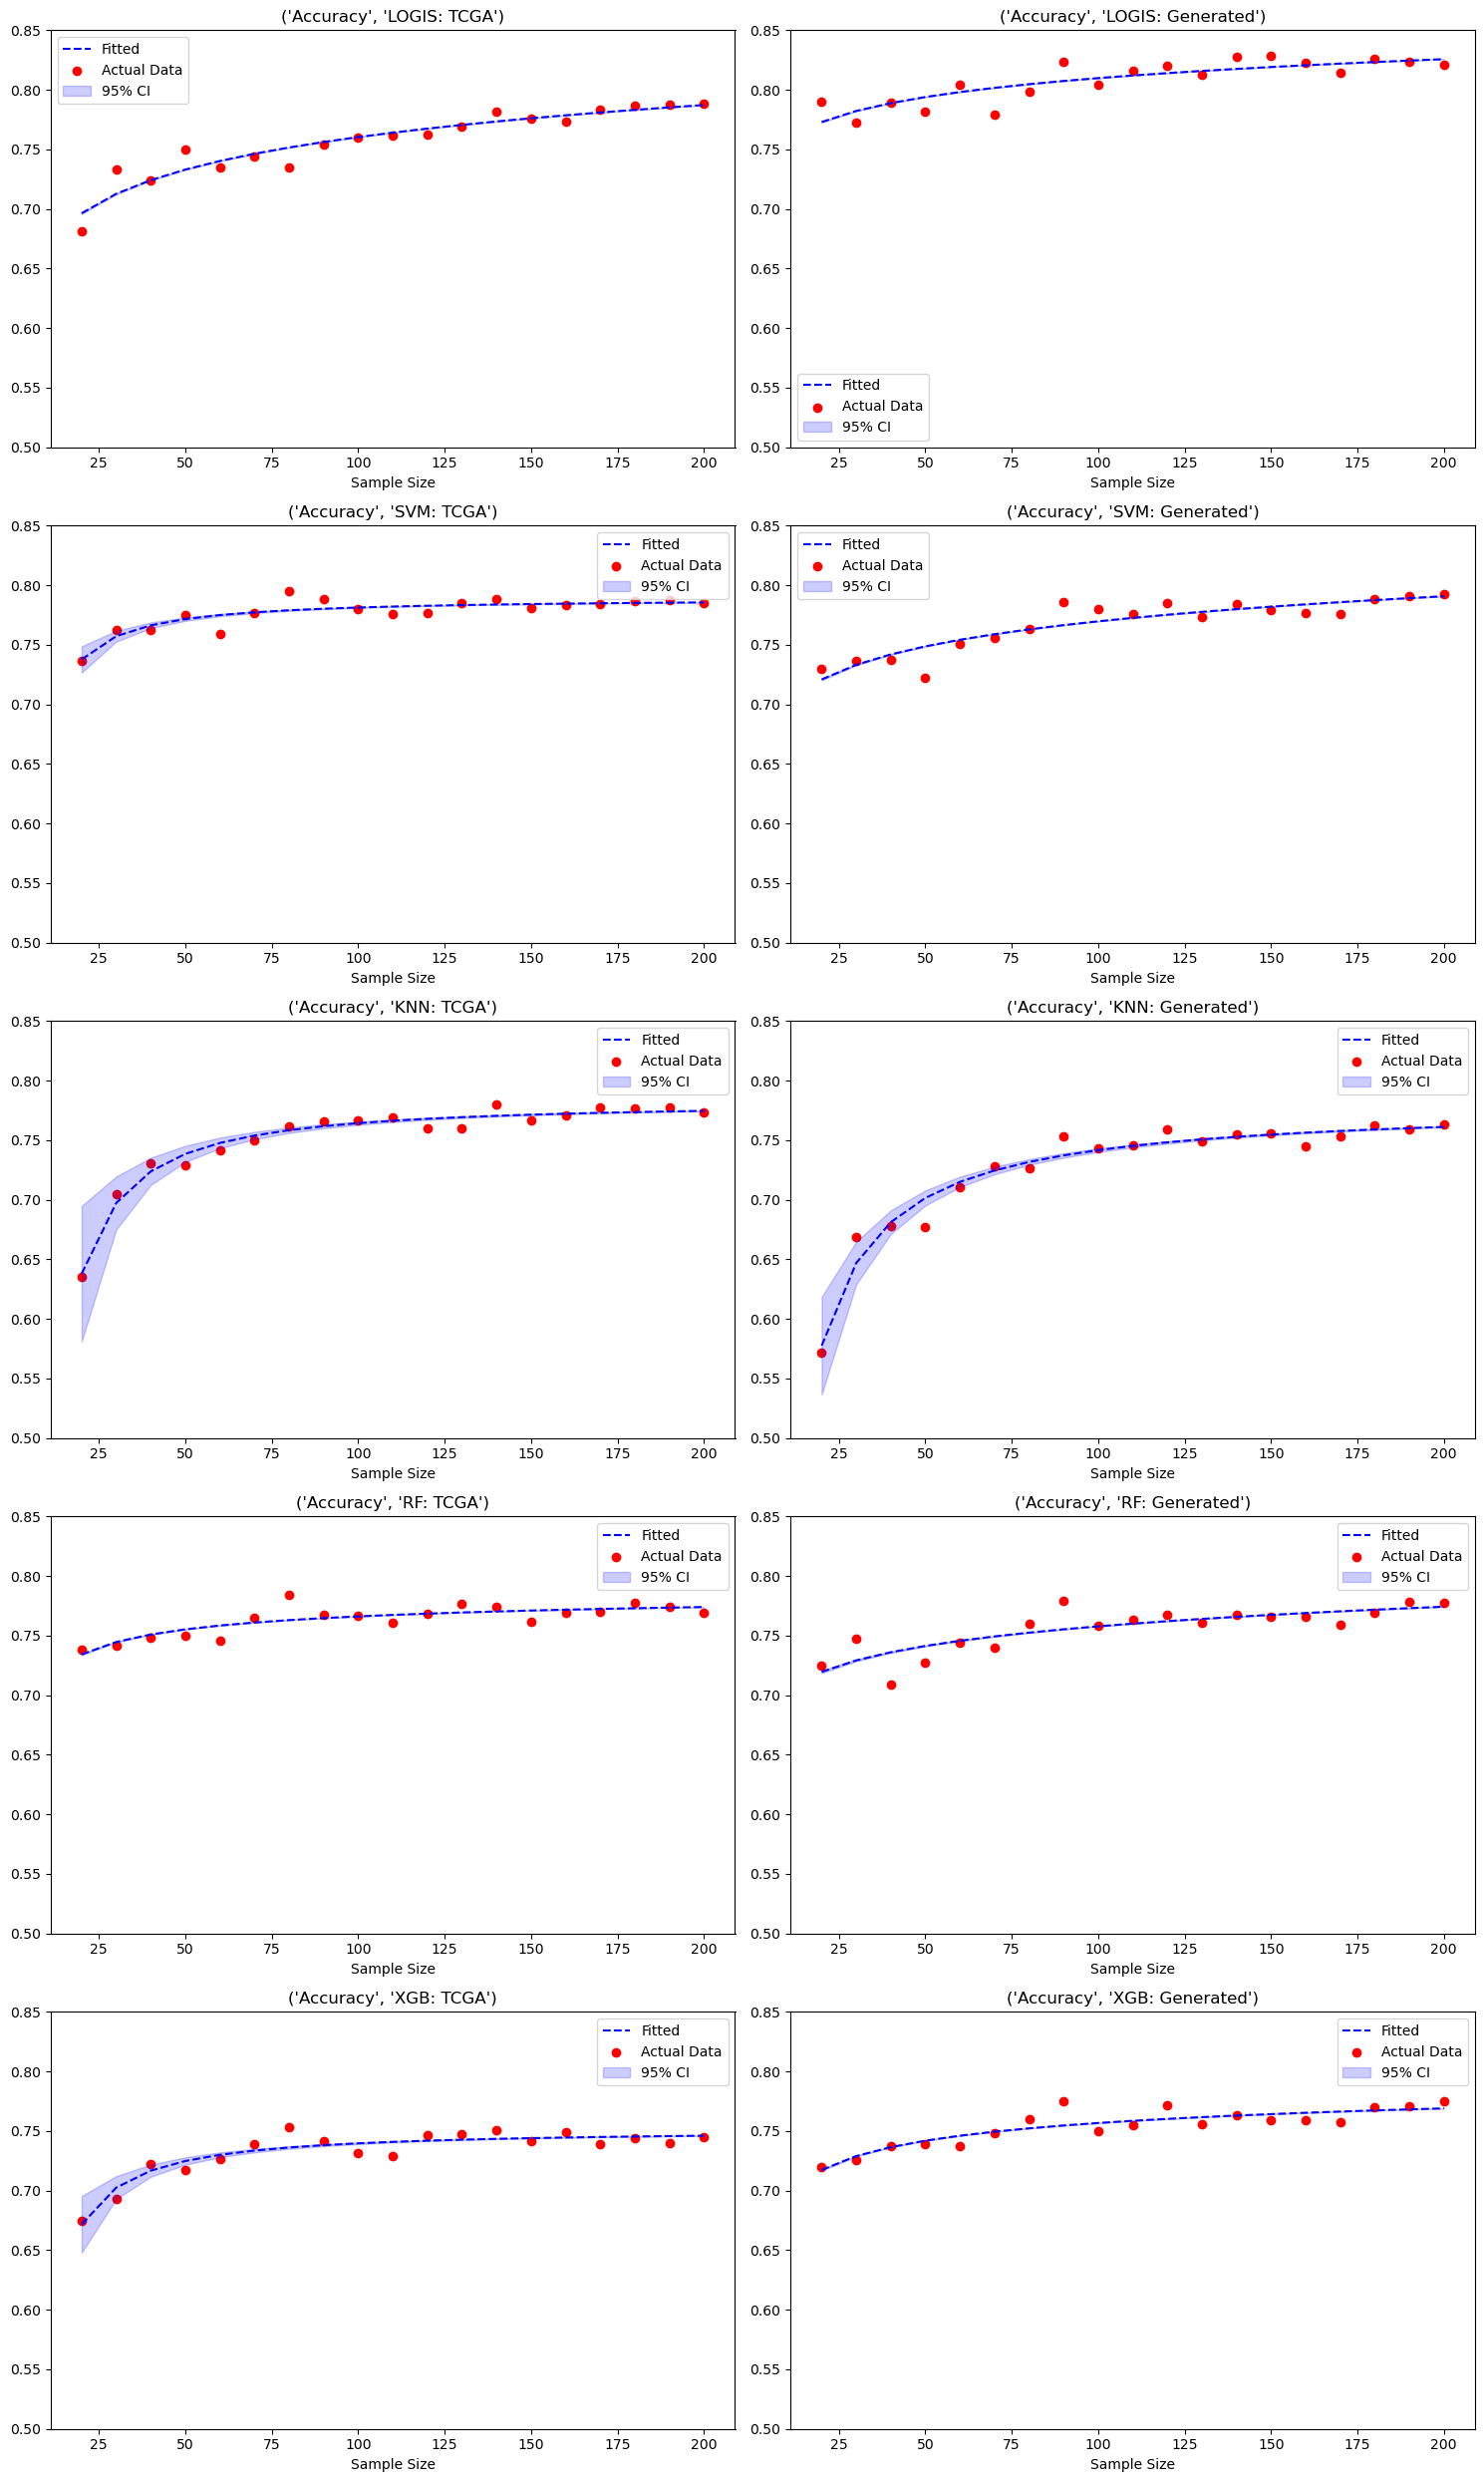

None


In [6]:
# Visualize the classifier performance
import matplotlib.pyplot as plt
p_acc = vis_classifier(metric_generated=metric_generated,
                       metric_real=metric_real,
                       n_target=n_target)

# Print the plot or result
print(p_acc)